# 1. Read the data as an appropriate Time Series data and plot the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn import metrics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('seaborn')
import warnings
from IPython.display import display
warnings.filterwarnings("ignore")

In [2]:
df_1 = pd.read_csv('SoftDrink.csv',parse_dates=True,squeeze=True,index_col=0)
df_1.head()

YearMonth
1980-01-01    1954
1980-02-01    2302
1980-03-01    3054
1980-04-01    2414
1980-05-01    2226
Name: SoftDrinkProduction, dtype: int64

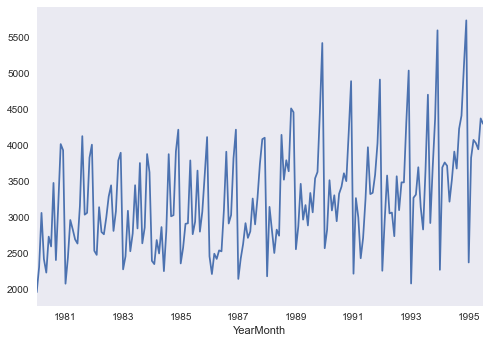

In [3]:
df_1.plot();
plt.grid()

In [4]:
df_1.describe()

count     187.000000
mean     3262.609626
std       728.357367
min      1954.000000
25%      2748.000000
50%      3134.000000
75%      3741.000000
max      5725.000000
Name: SoftDrinkProduction, dtype: float64

In [5]:
df_soft = pd.read_csv("SoftDrink.csv")

In [6]:
df_soft.head(10)

YearMonth  SoftDrinkProduction
0   1980-01                 1954
1   1980-02                 2302
2   1980-03                 3054
3   1980-04                 2414
4   1980-05                 2226
5   1980-06                 2725
6   1980-07                 2589
7   1980-08                 3470
8   1980-09                 2400
9   1980-10                 3180

In [7]:
df_soft.shape

(187, 2)

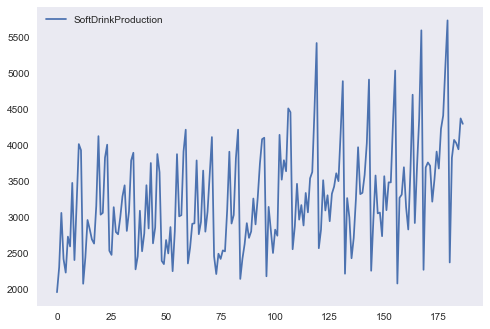

In [8]:
df_soft.plot();
plt.grid()

In [9]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [10]:
df_soft['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_soft.head()

YearMonth  SoftDrinkProduction Time_Stamp
0   1980-01                 1954 1980-01-31
1   1980-02                 2302 1980-02-29
2   1980-03                 3054 1980-03-31
3   1980-04                 2414 1980-04-30
4   1980-05                 2226 1980-05-31

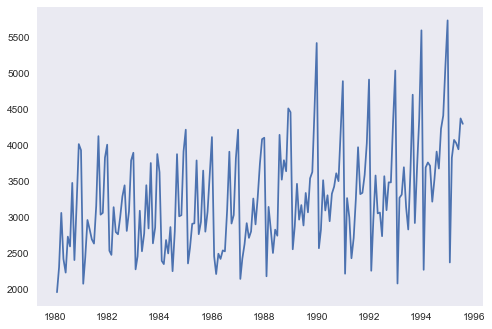

In [11]:
plt.plot(df_soft['Time_Stamp'],df_soft['SoftDrinkProduction']);
plt.grid()

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [12]:
df_soft.shape

(187, 3)

In [13]:
df_soft.dtypes

YearMonth                      object
SoftDrinkProduction             int64
Time_Stamp             datetime64[ns]
dtype: object

In [14]:
df_soft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   YearMonth            187 non-null    object        
 1   SoftDrinkProduction  187 non-null    int64         
 2   Time_Stamp           187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.5+ KB


In [15]:
df_soft.isnull().sum()

YearMonth              0
SoftDrinkProduction    0
Time_Stamp             0
dtype: int64

In [16]:
df_soft.duplicated().sum()

0

In [17]:
df_soft.describe()

SoftDrinkProduction
count           187.000000
mean           3262.609626
std             728.357367
min            1954.000000
25%            2748.000000
50%            3134.000000
75%            3741.000000
max            5725.000000

Text(0, 0.5, 'Units Sold')

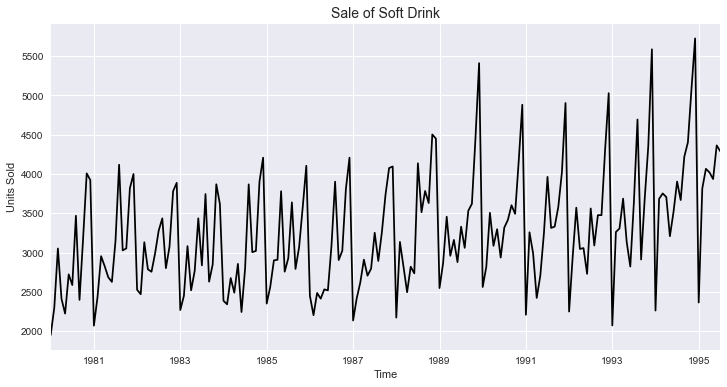

In [18]:
plt.figure(figsize = (12, 6))
df_1.plot(color='Black')
plt.title('Sale of Soft Drink', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

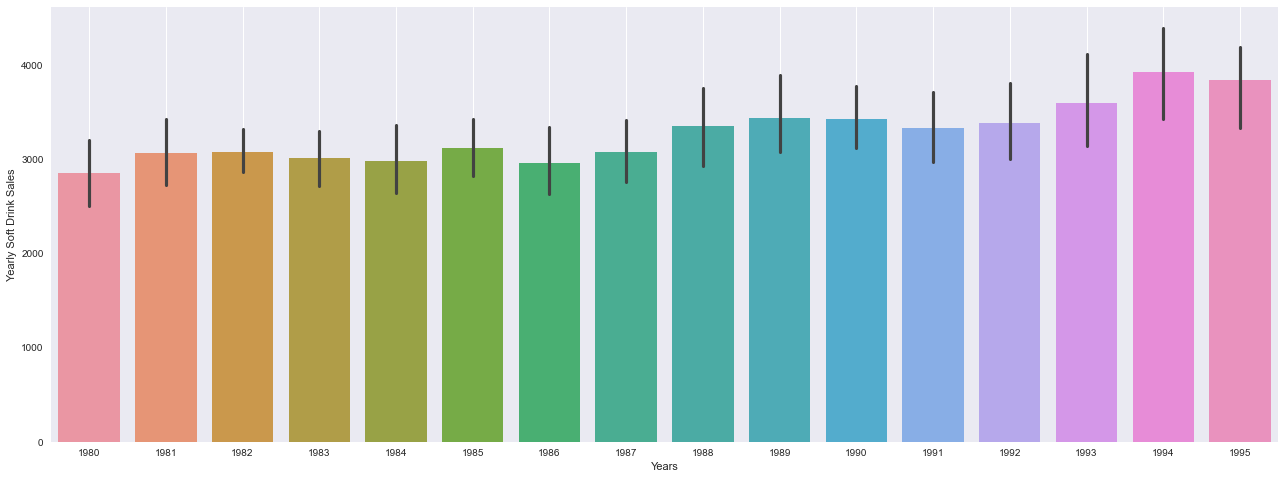

In [19]:
fig, ax = plt.subplots(figsize=(22,8))
sns.barplot(df_1.index.year, df_1, ax=ax)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Soft Drink Sales');

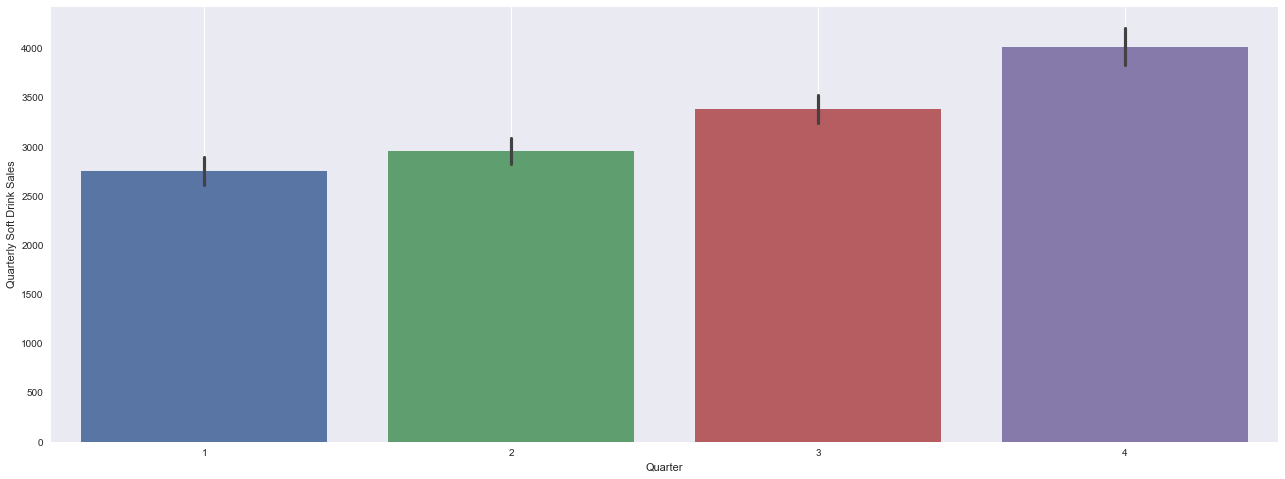

In [20]:
fig, ax = plt.subplots(figsize=(22,8))
sns.barplot(df_1.index.quarter, df_1, ax=ax)
plt.grid();
plt.xlabel('Quarter');
plt.ylabel('Quarterly Soft Drink Sales');

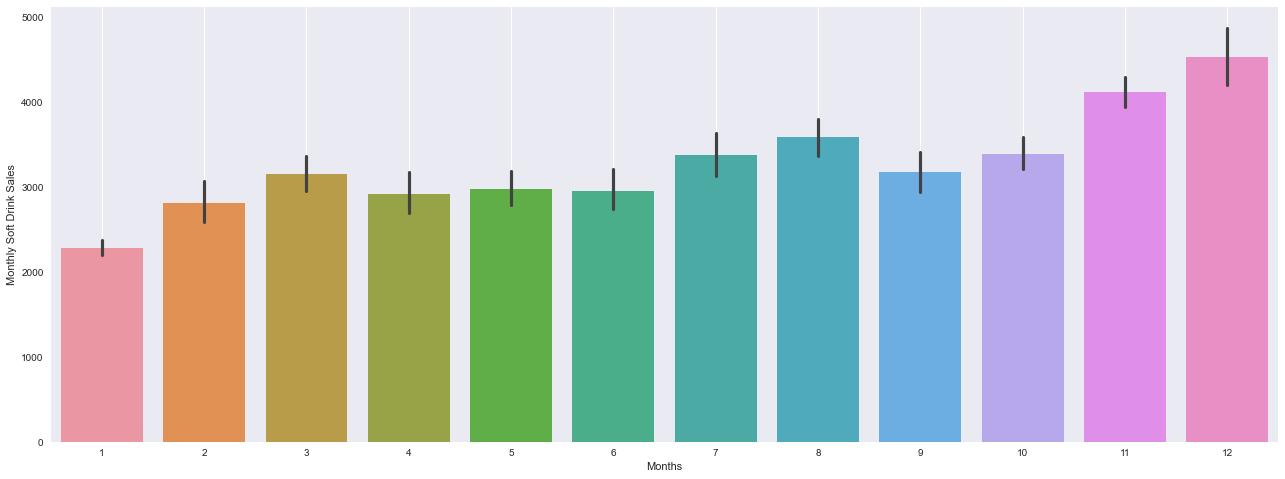

In [21]:
fig, ax = plt.subplots(figsize=(22,8))
sns.barplot(df_1.index.month, df_1, ax=ax)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Soft Drink Sales');

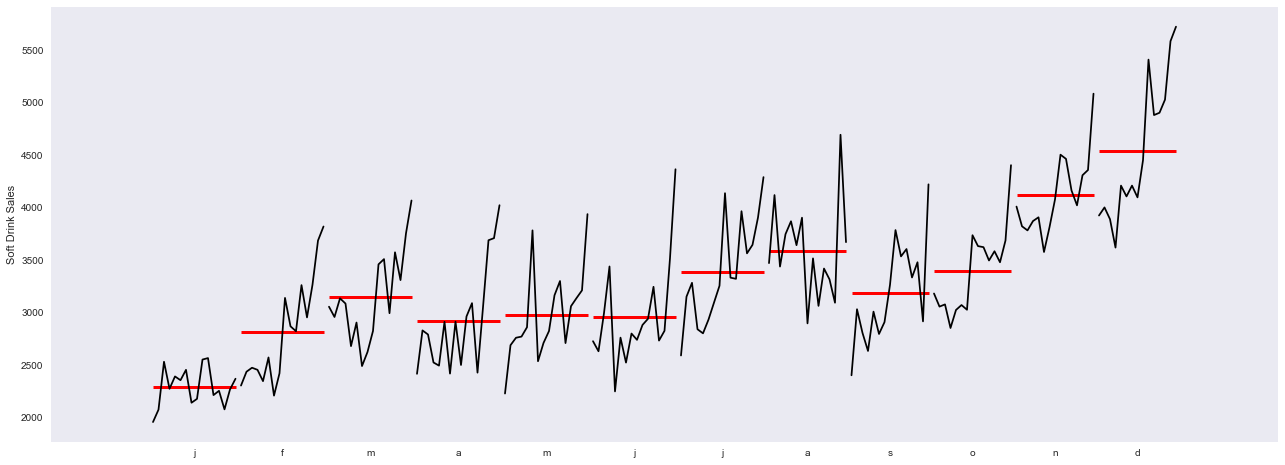

In [22]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Soft Drink Sales',ax=ax)
plt.grid();

In [23]:
df_soft.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_soft.head()

YearMonth  SoftDrinkProduction
Time_Stamp                               
1980-01-31   1980-01                 1954
1980-02-29   1980-02                 2302
1980-03-31   1980-03                 3054
1980-04-30   1980-04                 2414
1980-05-31   1980-05                 2226

In [24]:
df_soft.drop(labels='YearMonth',inplace=True,axis=1)
df_soft.head()

SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226

In [25]:
df_soft['SoftDrinkProduction']

Time_Stamp
1980-01-31    1954
1980-02-29    2302
1980-03-31    3054
1980-04-30    2414
1980-05-31    2226
              ... 
1995-03-31    4067
1995-04-30    4022
1995-05-31    3937
1995-06-30    4365
1995-07-31    4290
Name: SoftDrinkProduction, Length: 187, dtype: int64

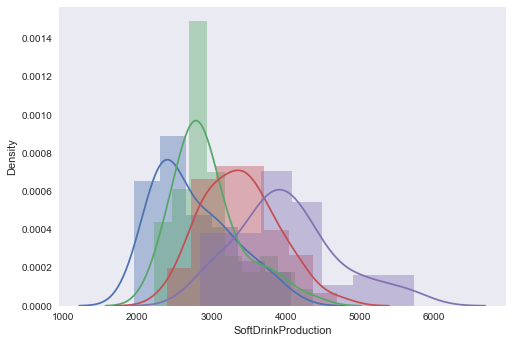

In [26]:
sns.distplot(df_1.loc[df_1.index.quarter == 1])
sns.distplot(df_1.loc[df_1.index.quarter == 2])
sns.distplot(df_1.loc[df_1.index.quarter == 3])
sns.distplot(df_1.loc[df_1.index.quarter == 4])
plt.grid();

In [27]:
yearly_sales_across_months = pd.pivot_table(df_soft, values = 'SoftDrinkProduction', columns = df_soft.index.month, 
                                        index = df_soft.index.year)

yearly_sales_across_months

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1954.0  2302.0  3054.0  2414.0  2226.0  2725.0  2589.0  3470.0   
1981        2072.0  2434.0  2956.0  2828.0  2687.0  2629.0  3150.0  4119.0   
1982        2529.0  2472.0  3134.0  2789.0  2758.0  2993.0  3282.0  3437.0   
1983        2271.0  2452.0  3084.0  2522.0  2769.0  3438.0  2839.0  3746.0   
1984        2389.0  2344.0  2678.0  2492.0  2858.0  2246.0  2800.0  3869.0   
1985        2353.0  2570.0  2903.0  2910.0  3782.0  2759.0  2931.0  3641.0   
1986        2452.0  2206.0  2488.0  2416.0  2534.0  2521.0  3093.0  3903.0   
1987        2138.0  2419.0  2622.0  2912.0  2708.0  2798.0  3254.0  2895.0   
1988        2175.0  3138.0  2823.0  2498.0  2822.0  2738.0  4137.0  3515.0   
1989        2550.0  2867.0  3458.0  2961.0  3163.0  2880.0  3331.0  3062.0   
1990        2564.0  2820.0  3508.0  3088.0  3299.0  2939.0  3320.0  3418.0   
1991        2211.0  3260.0  2992.0  2425.0  2707.0  3244.0  3965.0  3315.0   
1992        2252.0  2952.0  3573.0  3048.0  3059.0  2731.0  3563.0  3092.0   
1993        2075.0  3264.0  3308.0  3688.0  3136.0  2824.0  3644.0  4694.0   
1994        2265.0  3685.0  3754.0  3708.0  3210.0  3517.0  3905.0  3670.0   
1995        2367.0  3819.0  4067.0  4022.0  3937.0  4365.0  4290.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        2400.0  3180.0  4009.0  3924.0  
1981        3030.0  3055.0  3821.0  4001.0  
1982        2804.0  3076.0  3782.0  3889.0  
1983        2632.0  2851.0  3871.0  3618.0  
1984        3007.0  3023.0  3907.0  4209.0  
1985        2794.0  3070.0  3576.0  4106.0  
1986        2907.0  3025.0  3812.0  4209.0  
1987        3263.0  3736.0  4077.0  4097.0  
1988        3785.0  3632.0  4504.0  4451.0  
1989        3534.0  3622.0  4464.0  5411.0  
1990        3604.0  3495.0  4163.0  4882.0  
1991        3333.0  3583.0  4021.0  4904.0  
1992        3478.0  3478.0  4308.0  5029.0  
1993        2914.0  3686.0  4358.0  5587.0  
1994        4221.0  4404.0  5086.0  5725.0  
1995           NaN     NaN     NaN     NaN

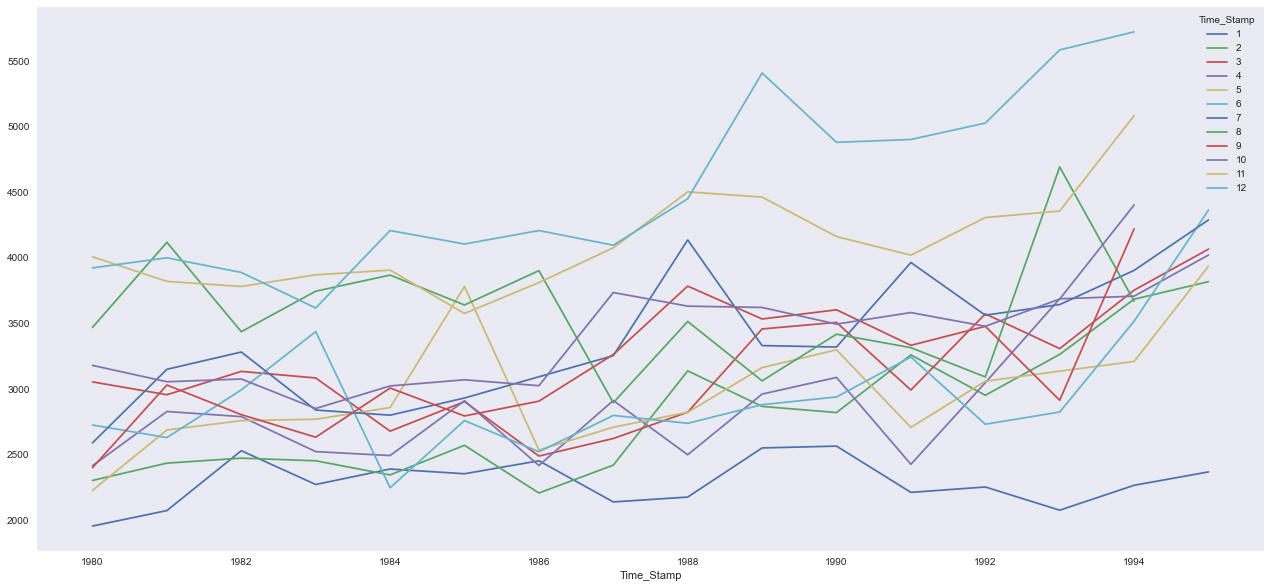

In [28]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

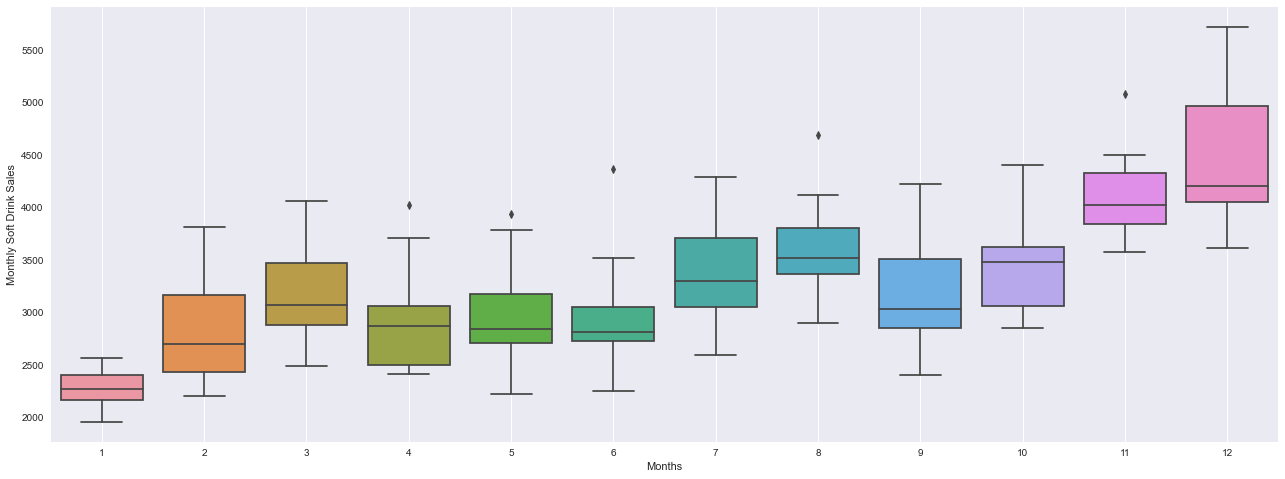

In [29]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Soft Drink Sales');

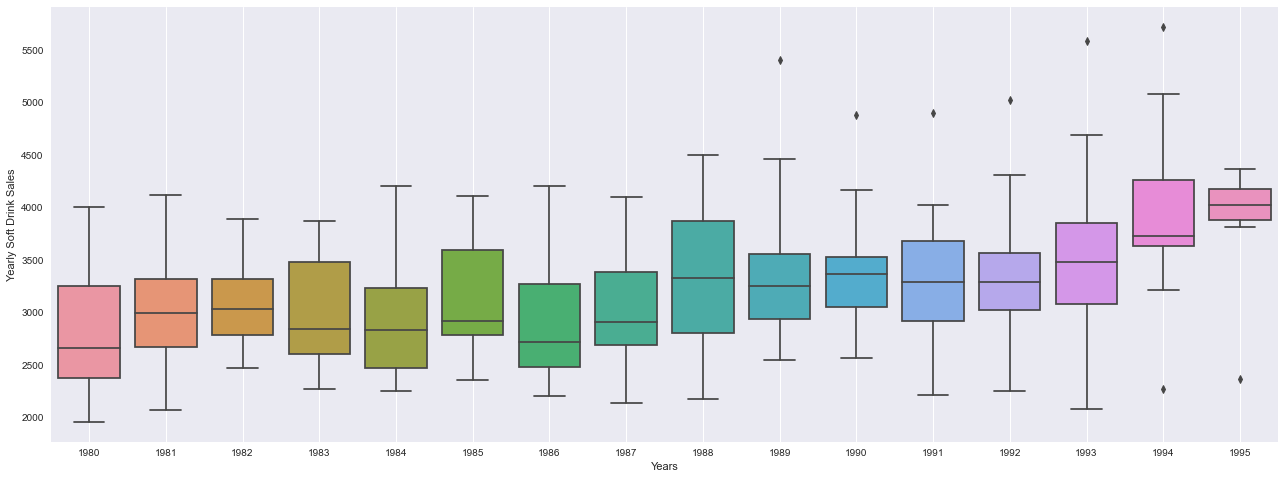

In [30]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Soft Drink Sales');

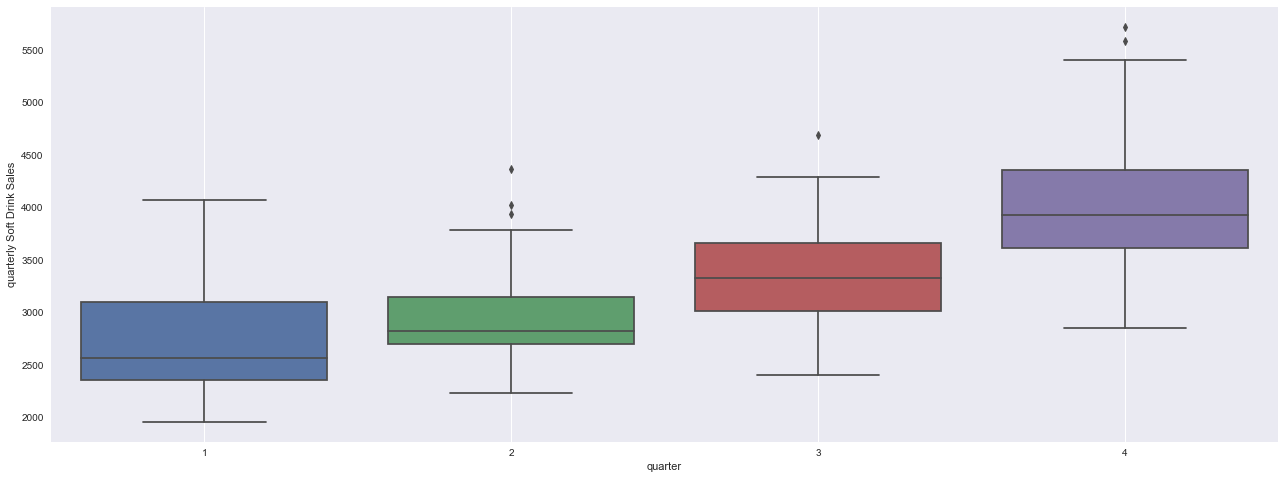

In [31]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.quarter, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('quarter');
plt.ylabel('quarterly Soft Drink Sales');

In [32]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

YearMonth
1980-12-31    34247
1981-12-31    36782
1982-12-31    36945
1983-12-31    36093
1984-12-31    35822
Freq: A-DEC, Name: SoftDrinkProduction, dtype: int64

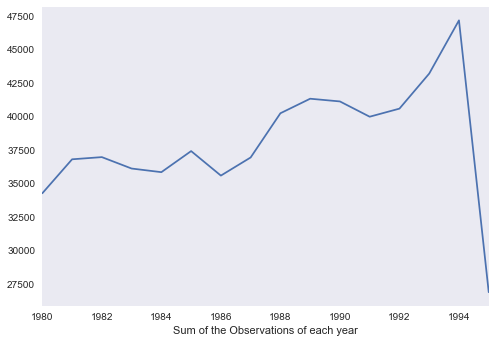

In [33]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [34]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

YearMonth
1980-12-31    2853.916667
1981-12-31    3065.166667
1982-12-31    3078.750000
1983-12-31    3007.750000
1984-12-31    2985.166667
Freq: A-DEC, Name: SoftDrinkProduction, dtype: float64

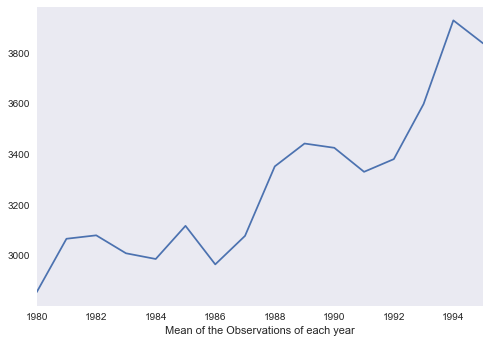

In [35]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

(a) Quarterly plot

In [36]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

YearMonth
1980-03-31     7310
1980-06-30     7365
1980-09-30     8459
1980-12-31    11113
1981-03-31     7462
Freq: Q-DEC, Name: SoftDrinkProduction, dtype: int64

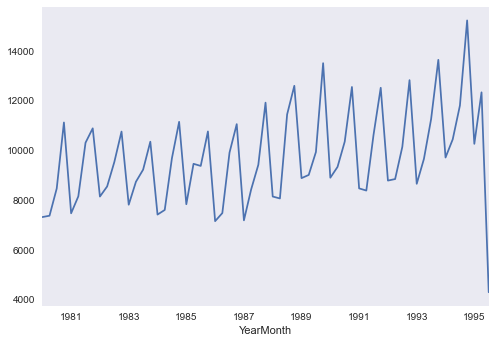

In [37]:
df_quarterly_sum.plot();
plt.grid()

In [38]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31    2436.666667
1980-06-30    2455.000000
1980-09-30    2819.666667
1980-12-31    3704.333333
1981-03-31    2487.333333
Freq: Q-DEC, Name: SoftDrinkProduction, dtype: float64

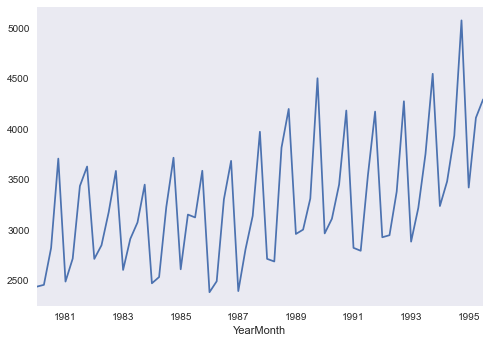

In [39]:
df_quarterly_mean.plot();
plt.grid()

(b) daily plot

In [40]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

YearMonth
1980-01-01    1954
1980-01-02       0
1980-01-03       0
1980-01-04       0
1980-01-05       0
              ... 
1995-06-27       0
1995-06-28       0
1995-06-29       0
1995-06-30       0
1995-07-01    4290
Freq: D, Name: SoftDrinkProduction, Length: 5661, dtype: int64

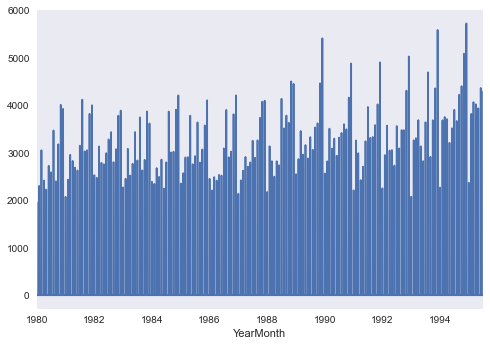

In [41]:
df_daily_sum.plot()
plt.grid();

(C) decade plot

In [42]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

YearMonth
1980-12-31     34247
1990-12-31    378143
2000-12-31    197718
Freq: 10A-DEC, Name: SoftDrinkProduction, dtype: int64

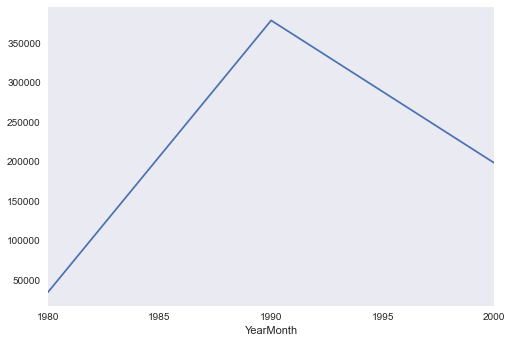

In [43]:
df_decade_sum.plot();
plt.grid()

# Decomposing the Time Series

In [44]:
from statsmodels.tsa.seasonal import   seasonal_decompose

(a) Additive Plot

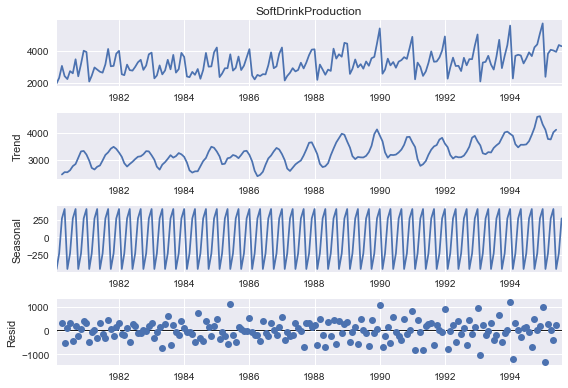

In [45]:
decomposition = seasonal_decompose(df_soft['SoftDrinkProduction'],model='additive', freq=4)
decomposition.plot();

In [46]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31    2465.000
1980-04-30    2551.875
1980-05-31    2546.625
1980-06-30    2620.500
1980-07-31    2774.250
1980-08-31    2852.875
1980-09-30    3087.250
1980-10-31    3321.500
1980-11-30    3337.250
1980-12-31    3203.000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -445.673973
1980-02-29   -225.054167
1980-03-31    268.633092
1980-04-30    402.095048
1980-05-31   -445.673973
1980-06-30   -225.054167
1980-07-31    268.633092
1980-08-31    402.095048
1980-09-30   -445.673973
1980-10-31   -225.054167
1980-11-30    268.633092
1980-12-31    402.095048
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31    320.366908
1980-04-30   -539.970048
1980-05-31    125.048973
1980-06-30    329.554167
1980-07-31   -453.883092
1980-08-31    215.029952
1980-09-30   -241.576027
1980-10-31     83.554167
1980-11-30    403.116908
1980-12-31    318.90

(b) Multiplicative Plot

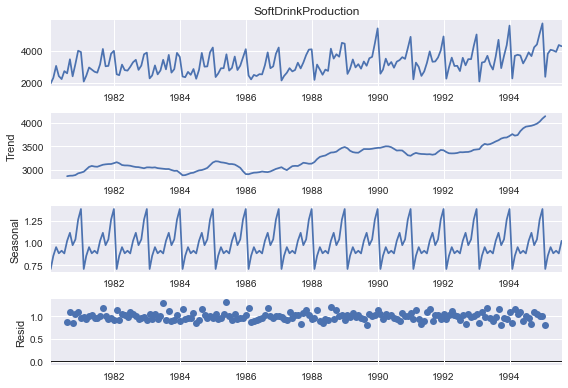

In [47]:
decomposition = seasonal_decompose(df_soft['SoftDrinkProduction'],model='multiplicative')
decomposition.plot();

In [48]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2858.833333
1980-08-31    2869.250000
1980-09-30    2870.666667
1980-10-31    2883.833333
1980-11-30    2920.291667
1980-12-31    2935.500000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.709526
1980-02-29    0.856420
1980-03-31    0.953935
1980-04-30    0.885217
1980-05-31    0.913735
1980-06-30    0.883890
1980-07-31    1.023936
1980-08-31    1.114195
1980-09-30    0.975955
1980-10-31    1.040944
1980-11-30    1.261792
1980-12-31    1.380456
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.884444
1980-08-31    1.085425
1980-09-30    0.856641
1980-10-31    1.059326
1980-11-30    1.087983
1980-12-31    0.968332
Name: r

In [49]:
detrend_ts = seasonality + residual

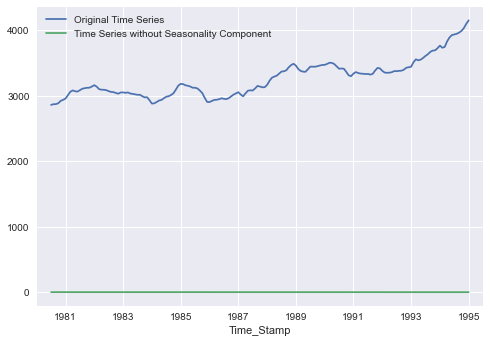

In [50]:
trend.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [51]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(10)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2859.717778
1980-08-31    2870.335425
1980-09-30    2871.523308
1980-10-31    2884.892659
dtype: float64

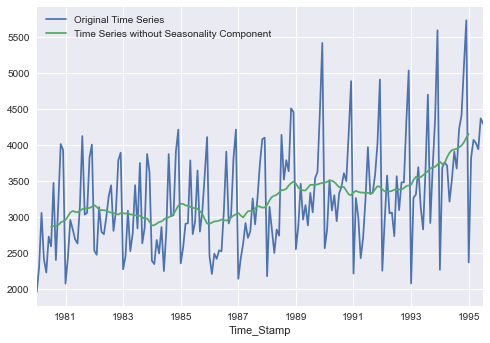

In [52]:
df_soft.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# 3. Split the data into training and test. The test data should start in 1991.

In [53]:
train = df_soft[df_soft.index.year < 1991]
test = df_soft[df_soft.index.year >= 1991]

In [54]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [55]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226

Last few rows of Training Data


SoftDrinkProduction
Time_Stamp                     
1990-08-31                 3418
1990-09-30                 3604
1990-10-31                 3495
1990-11-30                 4163
1990-12-31                 4882

First few rows of Test Data


SoftDrinkProduction
Time_Stamp                     
1991-01-31                 2211
1991-02-28                 3260
1991-03-31                 2992
1991-04-30                 2425
1991-05-31                 2707

Last few rows of Test Data


SoftDrinkProduction
Time_Stamp                     
1995-03-31                 4067
1995-04-30                 4022
1995-05-31                 3937
1995-06-30                 4365
1995-07-31                 4290

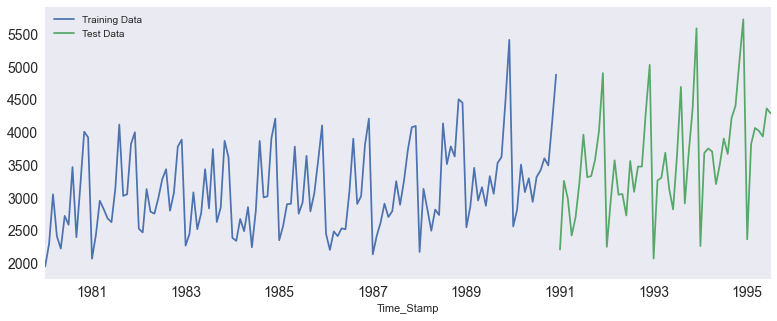

In [56]:
train['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
test['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

(a) Model 1: Linear Regression

In [57]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [58]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [59]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1980-01-31                 1954     1
1980-02-29                 2302     2
1980-03-31                 3054     3
1980-04-30                 2414     4
1980-05-31                 2226     5 

Last few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1990-08-31                 3418   128
1990-09-30                 3604   129
1990-10-31                 3495   130
1990-11-30                 4163   131
1990-12-31                 4882   132 

First few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                           
1991-01-31                 2211   133
1991-02-28                 3260   134
1991-03-31                 2992   135
1991-04-30                 2425   136
1991-05-31                 2707   137 

Last few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                      

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'].values)

LinearRegression()

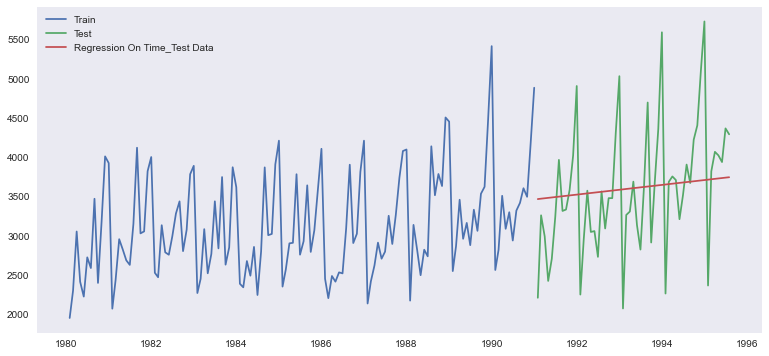

In [63]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [64]:
LinearRegression_train['RegOnTime_soft'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_soft'] = lr.predict(LinearRegression_test[['time']])

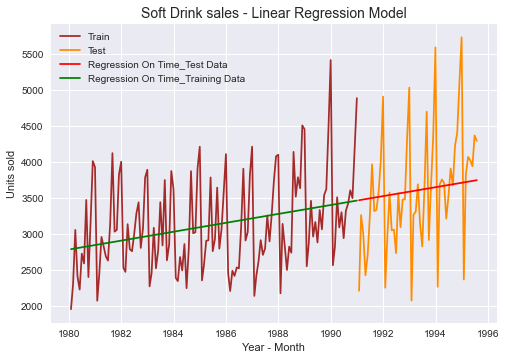

In [65]:
plt.plot( train['SoftDrinkProduction'], label='Train', color = 'brown')
plt.plot(test['SoftDrinkProduction'], label='Test', color = 'darkorange')
plt.plot(LinearRegression_test['RegOnTime_soft'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_soft'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Soft Drink sales - Linear Regression Model', fontsize = 14);

a1) Model Evaluvation - Test Data

In [66]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [67]:
## Soft Drink Testing Data - RMSE and MAPE

rmse_soft_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],LinearRegression_test['RegOnTime_soft'],squared=False)
mape_soft_model1_test = MAPE(test['SoftDrinkProduction'],LinearRegression_test['RegOnTime_soft'])
print("For RegressionOnTime forecast on the Soft Drink Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_model1_test, mape_soft_model1_test))

For RegressionOnTime forecast on the Soft Drink Testing Data:  RMSE is 775.808 and MAPE is 16.12


In [68]:
## Shoe Training Data - RMSE and MAPE

rmse_soft_model1_train = metrics.mean_squared_error(train['SoftDrinkProduction'],LinearRegression_train['RegOnTime_soft'],squared=False)
mape_soft_model1_train = MAPE(train['SoftDrinkProduction'],LinearRegression_train['RegOnTime_soft'])
print("For RegressionOnTime forecast on the Soft Drink Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_model1_train, mape_soft_model1_train))

For RegressionOnTime forecast on the Soft Drink Training Data:  RMSE is 610.338 and MAPE is 15.94


In [69]:
soft_resultsDf = pd.DataFrame({'Test RMSE': [rmse_soft_model1_test],'Test MAPE': [mape_soft_model1_test]},index=['RegressionOnTime'])
soft_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  775.80781      16.12

(b) Model 2: Naive forecast

In [70]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [71]:
NaiveModel_train['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    4882
1980-02-29    4882
1980-03-31    4882
1980-04-30    4882
1980-05-31    4882
Name: naive, dtype: int64

In [72]:
NaiveModel_test['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    4882
1991-02-28    4882
1991-03-31    4882
1991-04-30    4882
1991-05-31    4882
Name: naive, dtype: int64

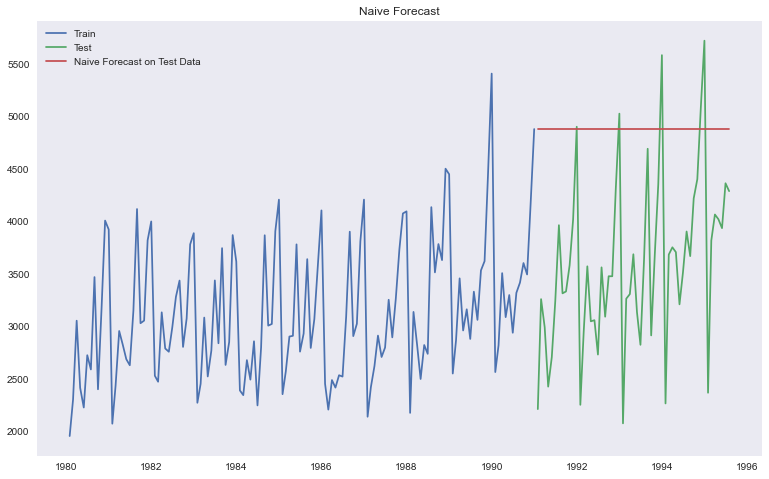

In [73]:
plt.figure(figsize=(13,8))
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Text(0.5, 1.0, 'Soft Drink Sales - Naive Forecast')

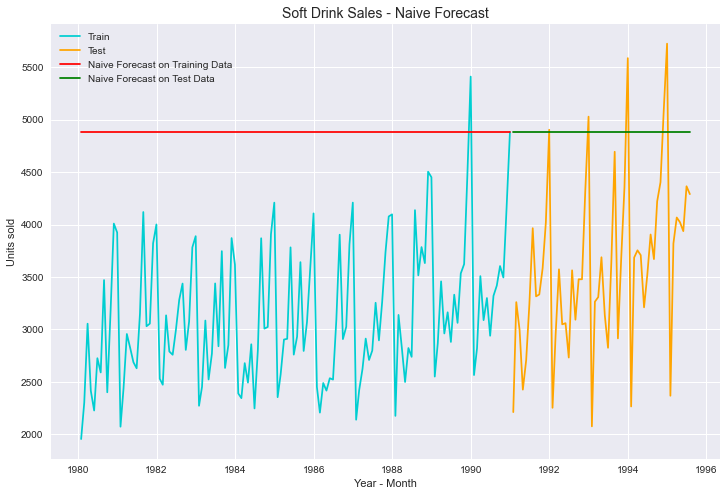

In [74]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train', color = 'darkturquoise')
plt.plot(test['SoftDrinkProduction'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Soft Drink Sales - Naive Forecast", fontsize = 14)

b1) Model Evauation - Test Data

In [75]:
## Soft Drink Testing Data - RMSE and MAPE

rmse_soft_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)
mape_soft_model2_test = MAPE(test['SoftDrinkProduction'],NaiveModel_test['naive'])
print("For Naive forecast on the Soft Drink Sales Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_model2_test, mape_soft_model2_test))

For Naive forecast on the Soft Drink Sales Testing Data:  RMSE is 1519.259 and MAPE is 37.75


In [76]:
## Soft Drink Training Data - RMSE and MAPE

rmse_soft_model2_train = metrics.mean_squared_error(train['SoftDrinkProduction'],NaiveModel_train['naive'],squared=False)
mape_soft_model2_train = MAPE(train['SoftDrinkProduction'],NaiveModel_train['naive'])
print("For Naive forecast on the Soft Drink Sales Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_model2_train, mape_soft_model2_train))

For Naive forecast on the Soft Drink Sales Training Data:  RMSE is 1871.070 and MAPE is 56.52


In [77]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_soft_model2_test],'Test MAPE': [mape_soft_model2_test]},index=['NaiveModel'])

soft_resultsDf = pd.concat([soft_resultsDf, resultsDf_2])
soft_resultsDf

Test RMSE  Test MAPE
RegressionOnTime   775.807810      16.12
NaiveModel        1519.259233      37.75

(C) Model 3: Simple Average

In [78]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [79]:
SimpleAverage_train['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_train['mean_forecast'].head()

Time_Stamp
1980-01-31    3124.166667
1980-02-29    3124.166667
1980-03-31    3124.166667
1980-04-30    3124.166667
1980-05-31    3124.166667
Name: mean_forecast, dtype: float64

In [80]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

SoftDrinkProduction  mean_forecast
Time_Stamp                                    
1991-01-31                 2211    3124.166667
1991-02-28                 3260    3124.166667
1991-03-31                 2992    3124.166667
1991-04-30                 2425    3124.166667
1991-05-31                 2707    3124.166667

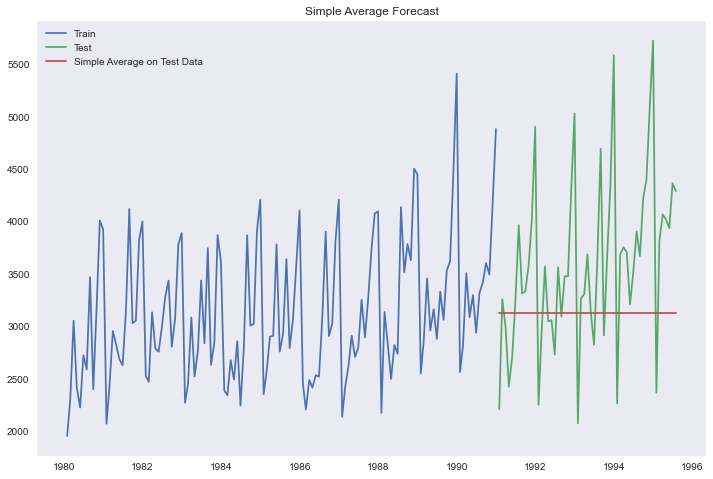

In [81]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Text(0.5, 1.0, 'Soft Drink - SimpleAverage Forecast')

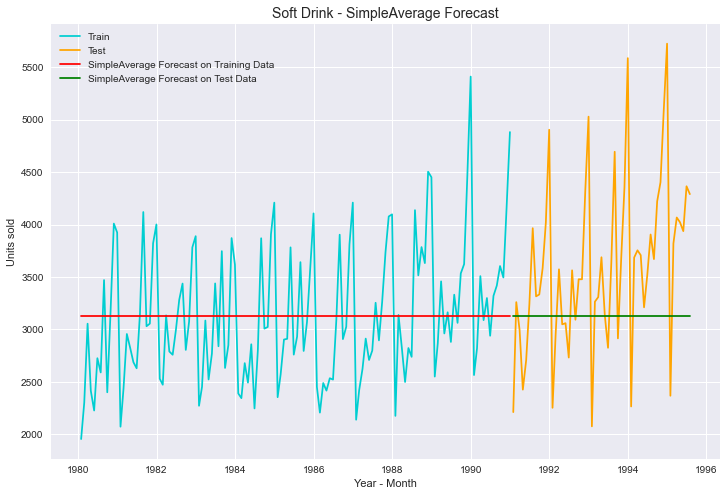

In [82]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train', color = 'darkturquoise')
plt.plot(test['SoftDrinkProduction'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Soft Drink - SimpleAverage Forecast", fontsize=14)

C1) Model Evaluvation - Test Data

In [83]:
## Soft Drink Testing Data - RMSE and MAPE

rmse_soft_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
mape_soft_model3_test = MAPE(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Soft Drink Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_model3_test, mape_soft_model3_test))

For Simple Average forecast on the Soft Drink Testing Data:  RMSE is 934.353 and MAPE is 20.12


In [84]:
## Soft Drink Training Data - RMSE and MAPE

rmse_soft_model3_train = metrics.mean_squared_error(train['SoftDrinkProduction'],SimpleAverage_train['mean_forecast'],squared=False)
mape_soft_model3_train = MAPE(train['SoftDrinkProduction'],SimpleAverage_train['mean_forecast'])
print("For Simple Average forecast on the Soft Drink Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_model3_train, mape_soft_model3_train))

For Simple Average forecast on the Soft Drink Training Data:  RMSE is 641.034 and MAPE is 16.70


In [85]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_soft_model3_test],'Test MAPE': [mape_soft_model3_test]},index=['SimpleAverage'])

soft_resultsDf = pd.concat([soft_resultsDf, resultsDf_2])
soft_resultsDf


Test RMSE  Test MAPE
RegressionOnTime   775.807810      16.12
NaiveModel        1519.259233      37.75
SimpleAverage      934.353358      20.12

(d) Method 4: Moving Average(MA)

In [86]:
MovingAverage = df_soft.copy()
MovingAverage.head()

SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226

In [87]:
MovingAverage['Soft_Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Soft_Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Soft_Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Soft_Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

In [88]:
MovingAverage.head()

SoftDrinkProduction  Soft_Trailing_2  Soft_Trailing_4  \
Time_Stamp                                                          
1980-01-31                 1954              NaN              NaN   
1980-02-29                 2302           2128.0              NaN   
1980-03-31                 3054           2678.0              NaN   
1980-04-30                 2414           2734.0           2431.0   
1980-05-31                 2226           2320.0           2499.0   

            Soft_Trailing_6  Soft_Trailing_9  
Time_Stamp                                    
1980-01-31              NaN              NaN  
1980-02-29              NaN              NaN  
1980-03-31              NaN              NaN  
1980-04-30              NaN              NaN  
1980-05-31              NaN              NaN

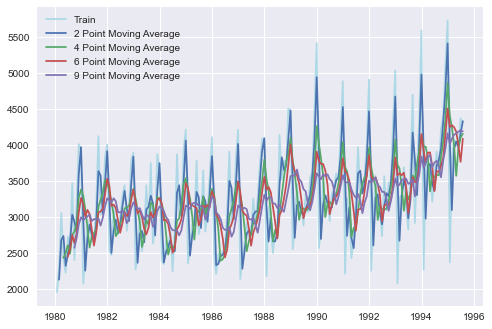

In [89]:
plt.plot(MovingAverage['SoftDrinkProduction'], label='Train', color='lightblue')
plt.plot(MovingAverage['Soft_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Soft_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Soft_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Soft_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [90]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Soft Drink - Trailing Moving Average Forecast')

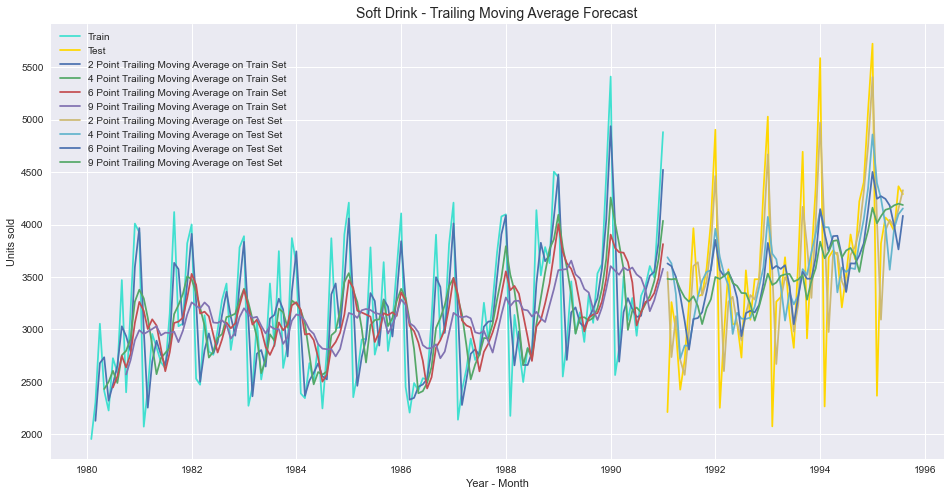

In [91]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Soft_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Soft_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Soft_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Soft_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Soft_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Soft_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Soft_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Soft_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Soft Drink - Trailing Moving Average Forecast", fontsize=14)

d1) Model Evaluvation - Test Data

In [92]:
## Test Data - rmse_soft and mape_soft --> 2 point Soft_Trailing MA

rmse_soft_model4_test_2 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Soft_Trailing_2'],squared=False)
mape_soft_model4_test_2 = MAPE(test['SoftDrinkProduction'],trailing_MovingAverage_test['Soft_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Testing Data,  rmse_soft is %3.3f mape_soft is %3.2f" %(rmse_soft_model4_test_2, mape_soft_model4_test_2))

## Test Data - rmse_spark and mape_spark --> 4 point Spark_Trailing MA

rmse_soft_model4_test_4 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Soft_Trailing_4'],squared=False)
mape_soft_model4_test_4 = MAPE(test['SoftDrinkProduction'],trailing_MovingAverage_test['Soft_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Testing Data,  rmse_soft is %3.3f mape_soft is %3.2f" %(rmse_soft_model4_test_4, mape_soft_model4_test_4))

## Test Data - rmse_spark and mape_spark --> 6 point Spark_Trailing MA

rmse_soft_model4_test_6 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Soft_Trailing_6'],squared=False)
mape_soft_model4_test_6 = MAPE(test['SoftDrinkProduction'],trailing_MovingAverage_test['Soft_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Testing Data,  rmse_soft is %3.3f mape_soft is %3.2f" %(rmse_soft_model4_test_6, mape_soft_model4_test_6))

## Test Data - rmse_spark and mape_spark --> 9 point Spark_Trailing MA

rmse_soft_model4_test_9 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Soft_Trailing_9'],squared=False)
mape_soft_model4_test_9 = MAPE(test['SoftDrinkProduction'],trailing_MovingAverage_test['Soft_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Testing Data,  rmse_soft is %3.3f mape_soft is %3.2f" %(rmse_soft_model4_test_9, mape_soft_model4_test_9))


For 2 point Moving Average Model forecast on the Testing Data,  rmse_soft is 556.725 mape_soft is 10.67
For 4 point Moving Average Model forecast on the Testing Data,  rmse_soft is 687.182 mape_soft is 13.71
For 6 point Moving Average Model forecast on the Testing Data,  rmse_soft is 710.514 mape_soft is 15.01
For 9 point Moving Average Model forecast on the Testing Data,  rmse_soft is 735.890 mape_soft is 15.33


In [93]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_soft_model4_test_2,rmse_soft_model4_test_4
                                          ,rmse_soft_model4_test_6,rmse_soft_model4_test_9]
                            ,'Test MAPE': [mape_soft_model4_test_2,mape_soft_model4_test_4,
                                           mape_soft_model4_test_6,mape_soft_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

soft_resultsDf = pd.concat([soft_resultsDf, resultsDf_4])
soft_resultsDf

Test RMSE  Test MAPE
RegressionOnTime   775.807810      16.12
NaiveModel        1519.259233      37.75
SimpleAverage      934.353358      20.12
2 point TMA        556.725418      10.67
4 point TMA        687.181726      13.71
6 point TMA        710.513877      15.01
9 point TMA        735.889827      15.33

(E) Model 5: Simple Exponential Smoothing

In [94]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [95]:
SES_train = train.copy()
SES_test = test.copy()

In [96]:
SES_train['SoftDrinkProduction'].head()

Time_Stamp
1980-01-31    1954
1980-02-29    2302
1980-03-31    3054
1980-04-30    2414
1980-05-31    2226
Name: SoftDrinkProduction, dtype: int64

In [97]:
model = SimpleExpSmoothing(np.asarray(SES_train['SoftDrinkProduction']))

Test: For alpha = 0.05,  RMSE is 819.0198 MAPE is 17.52
For smoothing level = 0.05,  Initial level 1954.00


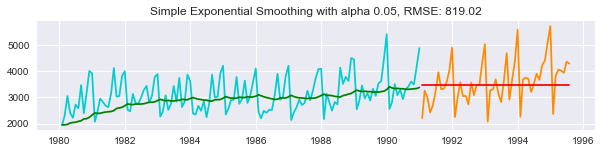

Test: For alpha = 0.10,  RMSE is 807.3469 MAPE is 17.30
For smoothing level = 0.10,  Initial level 1954.00


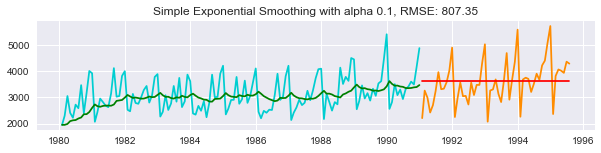

Test: For alpha = 0.20,  RMSE is 838.3572 MAPE is 18.55
For smoothing level = 0.20,  Initial level 1954.00


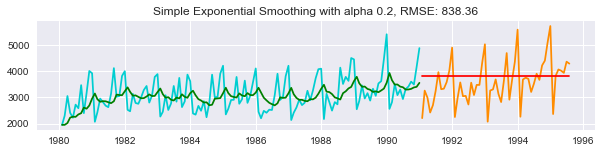

Test: For alpha = 0.30,  RMSE is 910.1874 MAPE is 20.65
For smoothing level = 0.30,  Initial level 1954.00


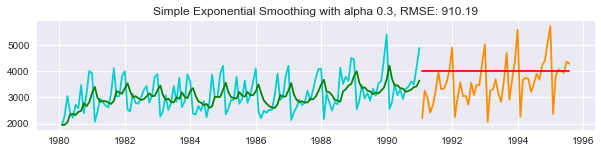

Test: For alpha = 0.50,  RMSE is 1105.9852 MAPE is 26.08
For smoothing level = 0.50,  Initial level 1954.00


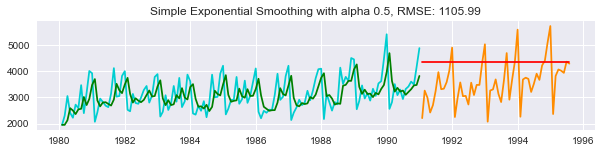

Test: For alpha = 0.99,  RMSE is 1513.1162 MAPE is 37.58
For smoothing level = 0.99,  Initial level 1954.00


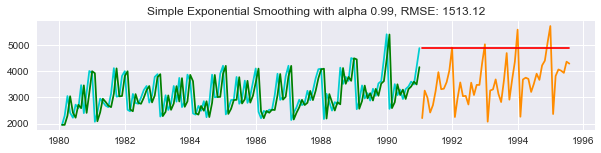

In [98]:
alpha_list = [0.05, 0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() 


for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['SoftDrinkProduction']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['SoftDrinkProduction'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['SoftDrinkProduction'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    


    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    
    plt.plot(train['SoftDrinkProduction'], color = 'darkturquoise')
    plt.plot(test['SoftDrinkProduction'], color = 'darkorange')
   
    plt.plot(pred_train_SES[alpha_str], color = 'green')
    plt.plot(pred_test_SES[alpha_str], color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
     
    plt.show();

In [99]:
model_SES_autofit = model.fit(optimized=True,use_brute=True)

In [100]:
model_SES_autofit.params

{'smoothing_level': 0.21628856026090082,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2297.4228976530517,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [101]:
SES_train['predict_soft'] = model_SES_autofit.fittedvalues
SES_train.head()

SoftDrinkProduction  predict_soft
Time_Stamp                                   
1980-01-31                 1954   2297.422898
1980-02-29                 2302   2223.144454
1980-03-31                 3054   2240.200006
1980-04-30                 2414   2416.215635
1980-05-31                 2226   2415.736419

In [102]:
SES_test['predict_soft'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

SoftDrinkProduction  predict_soft
Time_Stamp                                   
1991-01-31                 2211   3853.781071
1991-02-28                 3260   3853.781071
1991-03-31                 2992   3853.781071
1991-04-30                 2425   3853.781071
1991-05-31                 2707   3853.781071

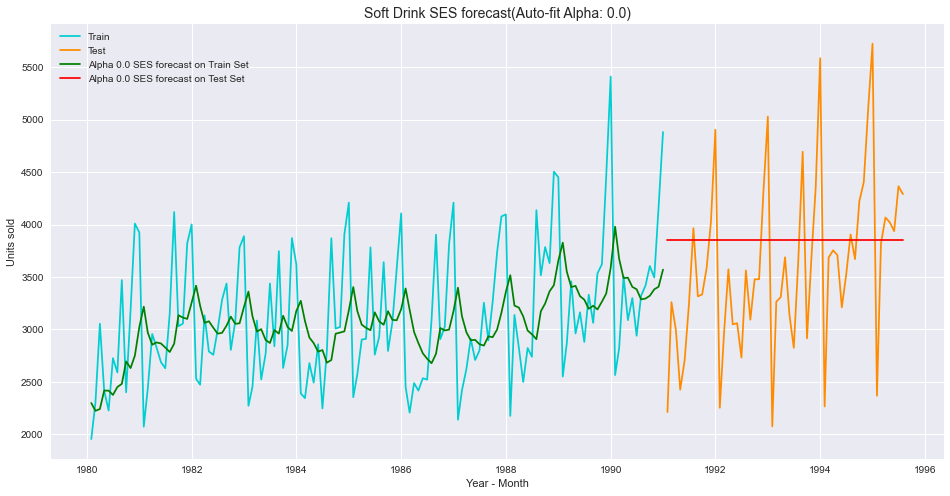

In [103]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['SoftDrinkProduction'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['SoftDrinkProduction'], label='Test', color = 'darkorange')

plt.plot(SES_train['predict_soft'],color = 'green', label='Alpha 0.0 SES forecast on Train Set')
plt.plot(SES_test['predict_soft'],color = 'red', label='Alpha 0.0 SES forecast on Test Set')

plt.legend(loc='best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Soft Drink SES forecast(Auto-fit Alpha: 0.0)', fontsize = 14);


E1) Model Evaluation - Test Data

In [104]:
## Soft Drink Testing Data - RMSE and MAPE

rmse_soft_model5_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SES_test['predict_soft'],squared=False)
mape_soft_model5_test = MAPE(test['SoftDrinkProduction'],SES_test['predict_soft'])
print("For SES forecast on the Soft Drink Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_model5_test, mape_soft_model5_test))

For SES forecast on the Soft Drink Testing Data:  RMSE is 847.635 and MAPE is 18.86


In [105]:
## Soft Drink Testing Data - RMSE and MAPE

rmse_soft_model5_train = metrics.mean_squared_error(train['SoftDrinkProduction'],SES_train['predict_soft'],squared=False)
mape_soft_model5_train = MAPE(train['SoftDrinkProduction'],SES_train['predict_soft'])
print("For SES forecast on the Soft Drink Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_model5_train, mape_soft_model5_train))

For SES forecast on the Soft Drink Training Data:  RMSE is 641.756 and MAPE is 16.12


In [106]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_soft_model5_test],'Test MAPE': [mape_soft_model5_test]},index=['SES Alpha 0.00'])

soft_resultsDf = pd.concat([soft_resultsDf, resultsDf_5])
soft_resultsDf

Test RMSE  Test MAPE
RegressionOnTime   775.807810      16.12
NaiveModel        1519.259233      37.75
SimpleAverage      934.353358      20.12
2 point TMA        556.725418      10.67
4 point TMA        687.181726      13.71
6 point TMA        710.513877      15.01
9 point TMA        735.889827      15.33
SES Alpha 0.00     847.635259      18.86

(F) Model 6: Double Exponential Smoothing (Holt's Model)

In [107]:
DES_train = train.copy()
DES_test = test.copy()

In [108]:
model_DES = Holt(DES_train['SoftDrinkProduction'])

In [109]:
resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[],
                            'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_soft',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict_soft',i,j] = model_DES_alpha_i_j.forecast(len(test['SoftDrinkProduction']))
        
        rmse_soft_model6_train = np.round(metrics.mean_squared_error(DES_train['SoftDrinkProduction'],DES_train['predict_soft',i,j],squared=False),2)
        mape_soft_model6_train = MAPE(DES_train['SoftDrinkProduction'],DES_train['predict_soft',i,j])
        
        rmse_soft_model6_test = np.round(metrics.mean_squared_error(DES_test['SoftDrinkProduction'],DES_test['predict_soft',i,j],squared=False),2)
        mape_soft_model6_test = MAPE(DES_test['SoftDrinkProduction'],DES_test['predict_soft',i,j])
        
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,
                                          'Train RMSE':rmse_soft_model6_train ,'Train MAPE': mape_soft_model6_train,
                                          'Test RMSE':rmse_soft_model6_test ,'Test MAPE':mape_soft_model6_test}, 
                                         ignore_index=True)

In [110]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1      636.98       16.58     985.42      23.72
1     0.1   0.2      649.47       17.01    1084.07      26.32
10    0.2   0.1      657.31       16.88    1524.53      37.81
2     0.1   0.3      660.31       17.35    1715.63      41.86
20    0.3   0.1      671.32       16.66    2306.00      58.65

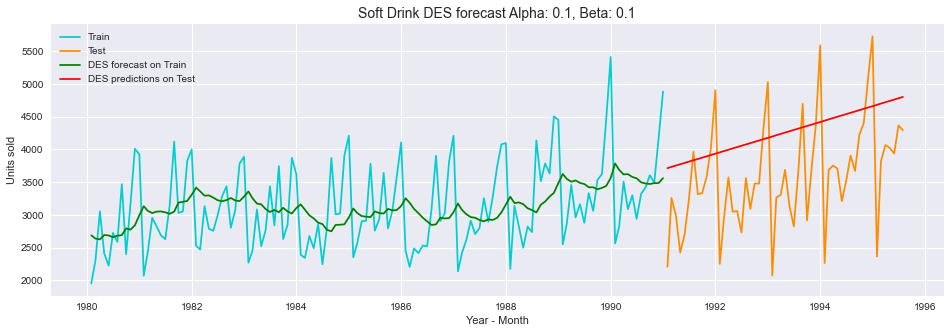

In [111]:
plt.figure(figsize=(16,5))
plt.plot(DES_train['SoftDrinkProduction'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['SoftDrinkProduction'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_soft', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_soft', 0.1, 0.1], color = 'red', label='DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Soft Drink DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best')

In [112]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [113]:
model_DES_autofit.params

{'smoothing_level': 0.4378514853671373,
 'smoothing_trend': 0.08358590797583047,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1958.2770405675203,
 'initial_trend': 64.17036117289133,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [114]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
alpha_6_1 = alpha
beta_6_1 = beta

In [115]:
DES_train['predict_soft',alpha,beta] = model_DES_autofit.fittedvalues
DES_train.head()

SoftDrinkProduction  (predict_soft, 0.1, 0.1)  \
Time_Stamp                                                  
1980-01-31                 1954               2688.389170   
1980-02-29                 2302               2638.810026   
1980-03-31                 3054               2625.620697   
1980-04-30                 2414               2693.234093   
1980-05-31                 2226               2687.293809   

            (predict_soft, 0.1, 0.2)  \
Time_Stamp                             
1980-01-31               2598.693719   
1980-02-29               2581.598060   
1980-03-31               2595.420006   
1980-04-30               2692.231357   
1980-05-31               2709.796946   

            (predict_soft, 0.1, 0.30000000000000004)  \
Time_Stamp                                             
1980-01-31                               2522.406949   
1980-02-29                               2523.259019   
1980-03-31                               2552.188111   
1980-04-30                               2668.478651   
1980-05-31                               2701.505777   

            (predict_soft, 0.1, 0.4)  (predict_soft, 0.1, 0.5)  \
Time_Stamp                                                       
1980-01-31               2519.900364               2515.557882   
1980-02-29               2523.858759               2530.607514   
1980-03-31               2553.346963               2567.521807   
1980-04-30               2675.112469               2700.268581   
1980-05-31               2710.256925               2741.427248   

            (predict_soft, 0.1, 0.6)  (predict_soft, 0.1, 0.7000000000000001)  \
Time_Stamp                                                                      
1980-01-31               2481.107818                              2451.898222   
1980-02-29               2511.831351                              2487.547146   
1980-03-31               2561.692649                              2541.442877   
1980-04-30               2711.306258                              2701.028034   
1980-05-31               2764.120131                              2760.562713   

            (predict_soft, 0.1, 0.8)  (predict_soft, 0.1, 0.9)  ...  \
Time_Stamp                                                      ...   
1980-01-31               2466.958152               2513.247551  ...   
1980-02-29               2495.885745               2540.267976  ...   
1980-03-31               2541.209719               2577.942240  ...   
1980-04-30               2698.224518               2729.894276  ...   
1980-05-31               2752.799876               2774.220623  ...   

            (predict_soft, 1.0, 0.2)  \
Time_Stamp                             
1980-01-31               1954.011440   
1980-02-29               2102.147903   
1980-03-31               2490.118322   
1980-04-30               3354.894658   
1980-05-31               2526.715726   

            (predict_soft, 1.0, 0.30000000000000004)  \
Time_Stamp                                             
1980-01-31                               1954.306401   
1980-02-29                               2151.375445   
1980-03-31                               2544.562812   
1980-04-30                               3449.393968   
1980-05-31                               2498.775778   

            (predict_soft, 1.0, 0.4)  (predict_soft, 1.0, 0.5)  \
Time_Stamp                                                       
1980-01-31               1954.076375               1954.114864   
1980-02-29               2197.658703               2242.356100   
1980-03-31               2587.395222               2620.178050   
1980-04-30               3526.037133               3589.089025   
1980-05-31               2441.222280               2361.544512   

            (predict_soft, 1.0, 0.6)  (predict_soft, 1.0, 0.7000000000000001)  \
Time_Stamp                                                                      
1980-01-31               1953.888494                              1953.820949   
1

In [116]:
DES_test['predict_soft',alpha,beta] = model_DES_autofit.forecast(len(test['SoftDrinkProduction']))
DES_test.head()

SoftDrinkProduction  (predict_soft, 0.1, 0.1)  \
Time_Stamp                                                  
1991-01-31                 2211               3713.116436   
1991-02-28                 3260               3733.249013   
1991-03-31                 2992               3753.381590   
1991-04-30                 2425               3773.514167   
1991-05-31                 2707               3793.646744   

            (predict_soft, 0.1, 0.2)  \
Time_Stamp                             
1991-01-31               3630.410378   
1991-02-28               3658.549242   
1991-03-31               3686.688106   
1991-04-30               3714.826970   
1991-05-31               3742.965835   

            (predict_soft, 0.1, 0.30000000000000004)  \
Time_Stamp                                             
1991-01-31                               3619.005799   
1991-02-28                               3672.503914   
1991-03-31                               3726.002030   
1991-04-30                               3779.500146   
1991-05-31                               3832.998262   

            (predict_soft, 0.1, 0.4)  (predict_soft, 0.1, 0.5)  \
Time_Stamp                                                       
1991-01-31               3657.327319               3669.372650   
1991-02-28               3734.533368               3765.587563   
1991-03-31               3811.739416               3861.802476   
1991-04-30               3888.945465               3958.017389   
1991-05-31               3966.151514               4054.232302   

            (predict_soft, 0.1, 0.6)  (predict_soft, 0.1, 0.7000000000000001)  \
Time_Stamp                                                                      
1991-01-31               3684.142627                              3716.897441   
1991-02-28               3803.581318                              3856.922964   
1991-03-31               3923.020009                              3996.948487   
1991-04-30               4042.458699                              4136.974010   
1991-05-31               4161.897390                              4276.999533   

            (predict_soft, 0.1, 0.8)  (predict_soft, 0.1, 0.9)  ...  \
Time_Stamp                                                      ...   
1991-01-31               3723.455064               3676.092691  ...   
1991-02-28               3873.099249               3831.923310  ...   
1991-03-31               4022.743433               3987.753929  ...   
1991-04-30               4172.387617               4143.584548  ...   
1991-05-31               4322.031801               4299.415167  ...   

            (predict_soft, 1.0, 0.2)  \
Time_Stamp                             
1991-01-31               5147.108013   
1991-02-28               5412.216026   
1991-03-31               5677.324039   
1991-04-30               5942.432053   
1991-05-31               6207.540066   

            (predict_soft, 1.0, 0.30000000000000004)  \
Time_Stamp                                             
1991-01-31                               5253.325648   
1991-02-28                               5624.651296   
1991-03-31                               5995.976944   
1991-04-30                               6367.302592   
1991-05-31                               6738.628240   

            (predict_soft, 1.0, 0.4)  (predict_soft, 1.0, 0.5)  \
Time_Stamp                                                       
1991-01-31               5340.677745               5412.984879   
1991-02-28               5799.355490               5943.969757   
1991-03-31               6258.033235               6474.954636   
1991-04-30               6716.710979               7005.939514   
1991-05-31               7175.388724               7536.924393   

            (predict_soft, 1.0, 0.6)  (predict_soft, 1.0, 0.7000000000000001)  \
Time_Stamp                                                                      
1991-01-31               5473.468086                              5523.268906   
1

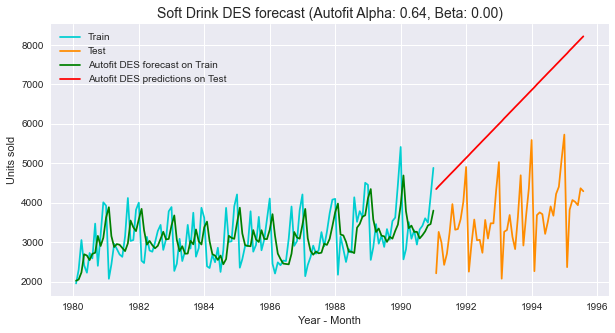

In [117]:
plt.figure(figsize=(10,5))
plt.plot(DES_train['SoftDrinkProduction'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['SoftDrinkProduction'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_soft',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_soft',alpha,beta], color = 'red', label='Autofit DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Soft Drink DES forecast (Autofit Alpha: 0.64, Beta: 0.00)', fontsize=14);
plt.legend(loc='best')

In [118]:
rmse_soft_model6_train = metrics.mean_squared_error(DES_train['SoftDrinkProduction'],DES_train['predict_soft',alpha,beta],squared=False)
mape_soft_model6_train = MAPE(DES_train['SoftDrinkProduction'],DES_train['predict_soft',alpha,beta])
        
rmse_soft_model6_test = metrics.mean_squared_error(DES_test['SoftDrinkProduction'],DES_test['predict_soft',alpha,beta],squared=False)
mape_soft_model6_test = MAPE(DES_test['SoftDrinkProduction'],DES_test['predict_soft',alpha,beta])

resultsDf_6 = resultsDf_6.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_soft_model6_train
                                      ,'Train MAPE': mape_soft_model6_train,'Test RMSE':rmse_soft_model6_test
                                      ,'Test MAPE':mape_soft_model6_test}, ignore_index=True)

In [119]:
resultsDf_6.sort_values(by=['Test RMSE']).head()


Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1      636.98       16.58     985.42      23.72
1     0.1   0.2      649.47       17.01    1084.07      26.32
10    0.2   0.1      657.31       16.88    1524.53      37.81
2     0.1   0.3      660.31       17.35    1715.63      41.86
20    0.3   0.1      671.32       16.66    2306.00      58.65

In [120]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1      636.98       16.58     985.42      23.72
1     0.1   0.2      649.47       17.01    1084.07      26.32
10    0.2   0.1      657.31       16.88    1524.53      37.81
2     0.1   0.3      660.31       17.35    1715.63      41.86
20    0.3   0.1      671.32       16.66    2306.00      58.65

f1) Model Evaluation - Test Data

In [121]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][100]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][100]]}
                           ,index=['DES Alpha 0.1,Beta 0.1','DES Alpha 0.6,Beta 0.0'])

soft_resultsDf = pd.concat([soft_resultsDf, resultsDf_6_1])
soft_resultsDf

Test RMSE  Test MAPE
RegressionOnTime         775.807810      16.12
NaiveModel              1519.259233      37.75
SimpleAverage            934.353358      20.12
2 point TMA              556.725418      10.67
4 point TMA              687.181726      13.71
6 point TMA              710.513877      15.01
9 point TMA              735.889827      15.33
SES Alpha 0.00           847.635259      18.86
DES Alpha 0.1,Beta 0.1   985.420000      23.72
DES Alpha 0.6,Beta 0.0  2892.865563      74.69

(G) Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [122]:
TES_train = train.copy()
TES_test = test.copy()

In [123]:
model_TES = ExponentialSmoothing(TES_train['SoftDrinkProduction'],trend='additive',seasonal='multiplicative',freq='M')

In [124]:
resultsDf_7_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_soft',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_soft',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['SoftDrinkProduction']))
        
            rmse_soft_model7_train = metrics.mean_squared_error(TES_train['SoftDrinkProduction'],TES_train['predict_soft',i,j,k],squared=False)
            mape_soft_model7_train = MAPE(TES_train['SoftDrinkProduction'],TES_train['predict_soft',i,j,k])
        
            rmse_soft_model7_test = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['predict_soft',i,j,k],squared=False)
            mape_soft_model7_test = MAPE(TES_test['SoftDrinkProduction'],TES_test['predict_soft',i,j,k])
        
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_soft_model7_train
                                      ,'Train MAPE': mape_soft_model7_train,'Test RMSE':rmse_soft_model7_test
                                      ,'Test MAPE': mape_soft_model7_test}, ignore_index=True)

In [125]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
230    0.3   0.4    0.1  356.089256        8.92  425.216689      10.15
501    0.6   0.1    0.2  353.229675        8.71  433.095652      10.37
411    0.5   0.2    0.2  357.355546        8.98  434.509581      10.17
412    0.5   0.2    0.3  358.445748        8.97  435.656204      10.30
500    0.6   0.1    0.1  356.606330        8.76  436.723430      10.48

In [126]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
615    0.7   0.2    0.6  415.376118       10.56  467.545816      10.00
230    0.3   0.4    0.1  356.089256        8.92  425.216689      10.15
411    0.5   0.2    0.2  357.355546        8.98  434.509581      10.17
412    0.5   0.2    0.3  358.445748        8.97  435.656204      10.30
603    0.7   0.1    0.4  371.094300        9.21  449.343750      10.36

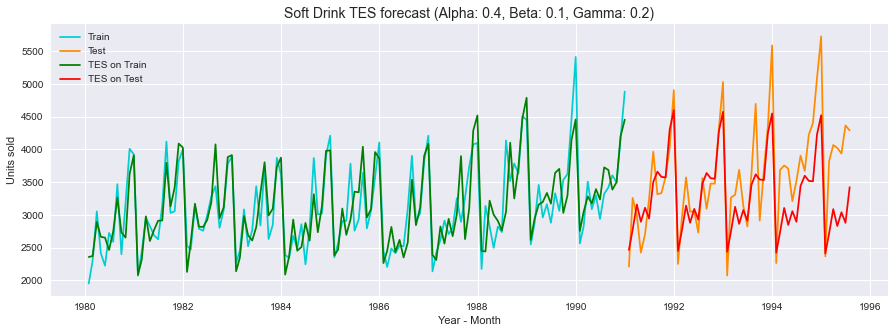

In [127]:
plt.figure(figsize=(15,5))
plt.plot(TES_train['SoftDrinkProduction'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['SoftDrinkProduction'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_soft', 0.4, 0.1, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_soft', 0.4, 0.1, 0.2], color='red', label='TES on Test')



plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Soft Drink TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

In [128]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [129]:
model_TES_autofit.params

{'smoothing_level': 0.11107294342846312,
 'smoothing_trend': 0.04936584946136444,
 'smoothing_seasonal': 0.39507937782841435,
 'damping_trend': nan,
 'initial_level': 2313.359495771716,
 'initial_trend': 17.430893736203817,
 'initial_seasons': array([1.07875068, 1.14873263, 1.37103923, 1.24793465, 1.28462127,
        1.26569943, 1.36723886, 1.62704366, 1.29444039, 1.38116248,
        1.74228632, 1.75643473]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [130]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_1 = alpha
beta_7_1 = beta
gamma_7_1 = gamma

In [131]:
TES_train['predict_soft',alpha,beta,gamma] = model_TES_autofit.fittedvalues

In [132]:
TES_test['predict_soft',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['SoftDrinkProduction']))

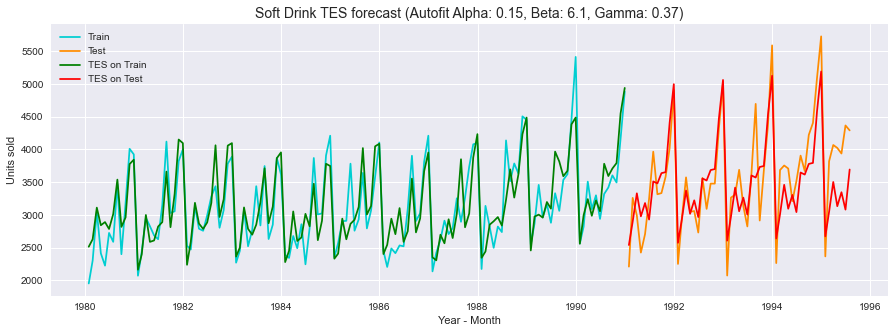

In [133]:
plt.figure(figsize=(15,5))
plt.plot(TES_train['SoftDrinkProduction'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['SoftDrinkProduction'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_soft',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_soft',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Soft Drink TES forecast (Autofit Alpha: 0.15, Beta: 6.1, Gamma: 0.37)', fontsize=14)

plt.legend(loc='best')

In [134]:
rmse_soft_model7_train = metrics.mean_squared_error(TES_train['SoftDrinkProduction'],TES_train['predict_soft',alpha,beta,gamma],squared=False)
mape_soft_model7_train = MAPE(TES_train['SoftDrinkProduction'],TES_train['predict_soft',alpha,beta,gamma])
        
rmse_soft_model7_test = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['predict_soft',alpha,beta,gamma],squared=False)
mape_soft_model7_test = MAPE(TES_test['SoftDrinkProduction'],TES_test['predict_soft',alpha,beta,gamma])
        
resultsDf_7_1 = resultsDf_7_1.append({'Alpha':np.round(alpha,2),'Beta':np.round(beta,2),'Gamma':np.round(gamma,2),'Train RMSE':rmse_soft_model7_train
                                      ,'Train MAPE': mape_soft_model7_train,'Test RMSE':rmse_soft_model7_test
                                      ,'Test MAPE': mape_soft_model7_test}, ignore_index=True)

In [135]:
resultsDf_7_1.tail()

Alpha  Beta  Gamma     Train RMSE  Train MAPE      Test RMSE  Test MAPE
996    1.00  1.00    0.7   45084.062471      516.45  101287.462538    1555.59
997    1.00  1.00    0.8  149842.560305     1234.33  139422.981493    2000.34
998    1.00  1.00    0.9   49254.883795      537.10  241047.947555    2626.81
999    1.00  1.00    1.0   37225.961714      461.29  125251.633487    2053.73
1000   0.11  0.05    0.4     327.647341        7.89     460.081582      10.29

In [136]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
230    0.3   0.4    0.1  356.089256        8.92  425.216689      10.15
501    0.6   0.1    0.2  353.229675        8.71  433.095652      10.37
411    0.5   0.2    0.2  357.355546        8.98  434.509581      10.17
412    0.5   0.2    0.3  358.445748        8.97  435.656204      10.30
500    0.6   0.1    0.1  356.606330        8.76  436.723430      10.48

In [137]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
615    0.70  0.20    0.6  415.376118       10.56  467.545816      10.00
230    0.30  0.40    0.1  356.089256        8.92  425.216689      10.15
411    0.50  0.20    0.2  357.355546        8.98  434.509581      10.17
1000   0.11  0.05    0.4  327.647341        7.89  460.081582      10.29
412    0.50  0.20    0.3  358.445748        8.97  435.656204      10.30

G1) Model Evaluation - Test Data

In [138]:
resultsDf_7_sp = pd.DataFrame({'Test RMSE': [resultsDf_7_1['Test RMSE'][301],resultsDf_7_1['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_1['Test MAPE'][301],resultsDf_7_1['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.4, Beta 0.1, Gamma 0.2','TES Alpha 0.15, Beta 0.00, Gamma 0.37'])

soft_resultsDf = pd.concat([soft_resultsDf, resultsDf_7_sp])
soft_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                        775.807810      16.12
NaiveModel                             1519.259233      37.75
SimpleAverage                           934.353358      20.12
2 point TMA                             556.725418      10.67
4 point TMA                             687.181726      13.71
6 point TMA                             710.513877      15.01
9 point TMA                             735.889827      15.33
SES Alpha 0.00                          847.635259      18.86
DES Alpha 0.1,Beta 0.1                  985.420000      23.72
DES Alpha 0.6,Beta 0.0                 2892.865563      74.69
TES Alpha 0.4, Beta 0.1, Gamma 0.2      596.937644      12.94
TES Alpha 0.15, Beta 0.00, Gamma 0.37   460.081582      10.29

In [139]:
soft_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.15, Beta 0.00, Gamma 0.37   460.081582      10.29
2 point TMA                             556.725418      10.67
TES Alpha 0.4, Beta 0.1, Gamma 0.2      596.937644      12.94
4 point TMA                             687.181726      13.71
6 point TMA                             710.513877      15.01
9 point TMA                             735.889827      15.33
RegressionOnTime                        775.807810      16.12
SES Alpha 0.00                          847.635259      18.86
SimpleAverage                           934.353358      20.12
DES Alpha 0.1,Beta 0.1                  985.420000      23.72
NaiveModel                             1519.259233      37.75
DES Alpha 0.6,Beta 0.0                 2892.865563      74.69

Ploting all the above models

Text(0.5, 1.0, 'SOFT DRINK : Forecast Vs Actual Test set')

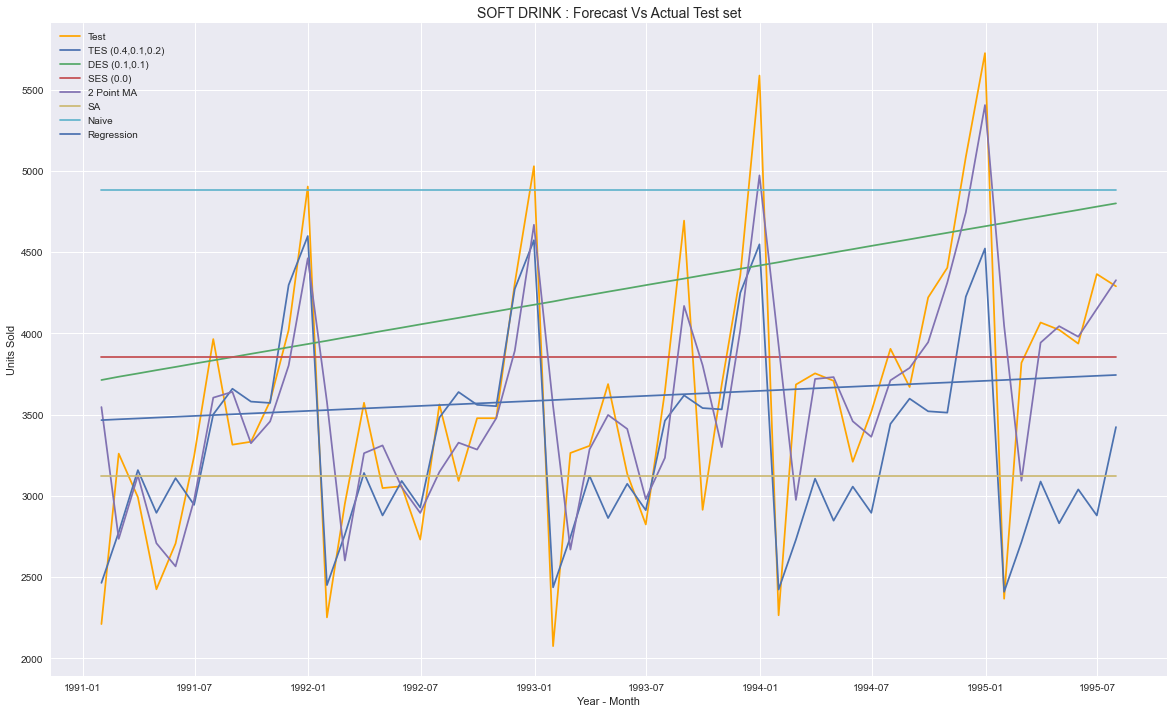

In [140]:
plt.figure(figsize=(20,12))

plt.plot(TES_test['SoftDrinkProduction'], label='Test', color = 'orange')
#TES
plt.plot(TES_test['predict_soft',0.4,0.1,0.2],  label='TES (0.4,0.1,0.2)')
#DES
plt.plot(DES_test['predict_soft',0.1,0.1],  label='DES (0.1,0.1)')
#SES
plt.plot(SES_test['predict_soft'],  label='SES (0.0)')
#MA
plt.plot(trailing_MovingAverage_test['Soft_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_soft'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year - Month')
plt.ylabel('Units Sold')
plt.title('SOFT DRINK : Forecast Vs Actual Test set', fontsize=14)

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [141]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='green', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

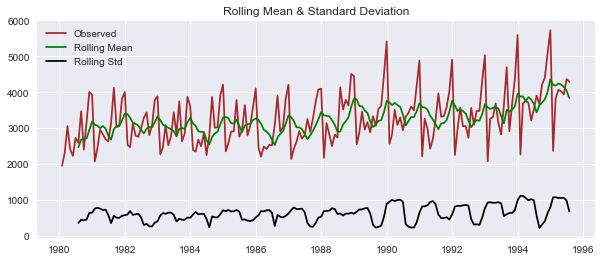

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [142]:
plt.figure(figsize=(10,4))
test_stationarity(df_soft['SoftDrinkProduction'],'brown')

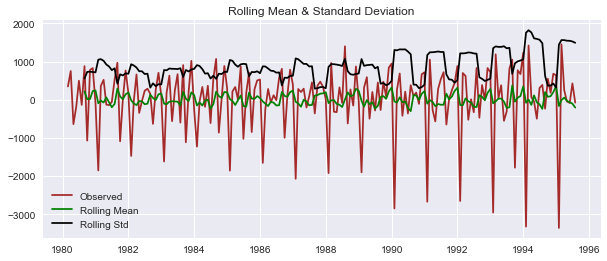

Results of Dickey-Fuller Test:
Test Statistic                -9.313527e+00
p-value                        1.033701e-15
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [143]:
plt.figure(figsize=(10,4))
test_stationarity(df_soft['SoftDrinkProduction'].diff().dropna(),'brown')

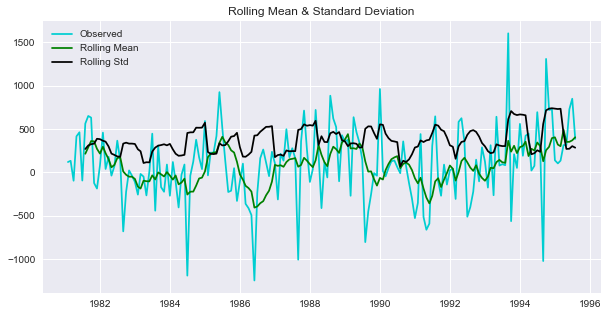

Results of Dickey-Fuller Test:
Test Statistic                  -2.210799
p-value                          0.202349
#Lags Used                      14.000000
Number of Observations Used    160.000000
Critical Value (1%)             -3.471896
Critical Value (5%)             -2.879780
Critical Value (10%)            -2.576495
dtype: float64 



In [144]:
plt.figure(figsize=(10,5))
test_stationarity(df_soft['SoftDrinkProduction'].diff(12).dropna(), 'darkturquoise')

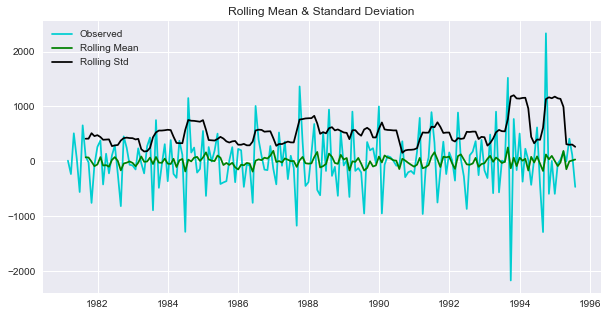

Results of Dickey-Fuller Test:
Test Statistic                -5.914167e+00
p-value                        2.596398e-07
#Lags Used                     1.400000e+01
Number of Observations Used    1.590000e+02
Critical Value (1%)           -3.472161e+00
Critical Value (5%)           -2.879895e+00
Critical Value (10%)          -2.576557e+00
dtype: float64 



In [145]:
plt.figure(figsize=(10,5))
test_stationarity((df_soft['SoftDrinkProduction'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

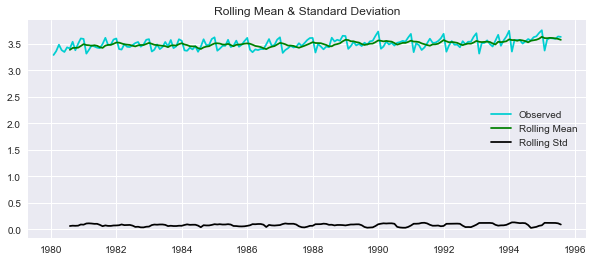

Results of Dickey-Fuller Test:
Test Statistic                   0.466889
p-value                          0.983831
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [146]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df_soft['SoftDrinkProduction']), 'darkturquoise')

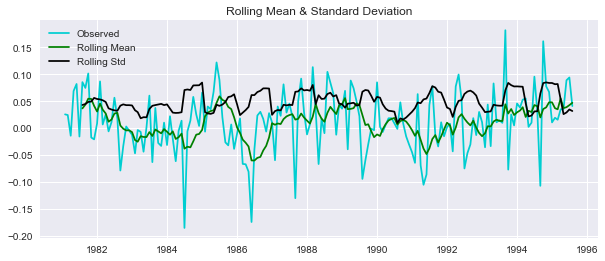

Results of Dickey-Fuller Test:
Test Statistic                  -2.532151
p-value                          0.107846
#Lags Used                      14.000000
Number of Observations Used    160.000000
Critical Value (1%)             -3.471896
Critical Value (5%)             -2.879780
Critical Value (10%)            -2.576495
dtype: float64 



In [147]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df_soft['SoftDrinkProduction']).diff(12).dropna(),  'darkturquoise')

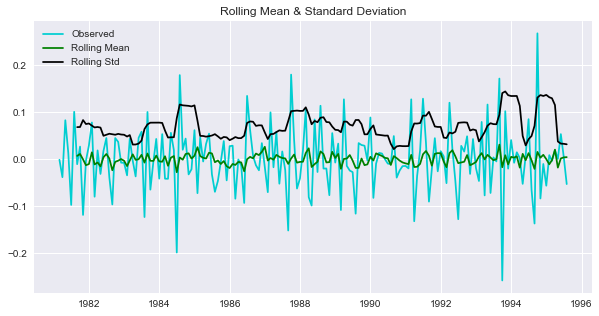

Results of Dickey-Fuller Test:
Test Statistic                -5.903591e+00
p-value                        2.741519e-07
#Lags Used                     1.400000e+01
Number of Observations Used    1.590000e+02
Critical Value (1%)           -3.472161e+00
Critical Value (5%)           -2.879895e+00
Critical Value (10%)          -2.576557e+00
dtype: float64 



In [148]:
plt.figure(figsize=(10,5))
test_stationarity((np.log10(df_soft['SoftDrinkProduction']).diff(12).dropna()).diff().dropna(),'darkturquoise')

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [149]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [150]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for the Model
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [151]:
SARIMA_AIC_soft = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_soft

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [152]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_soft = sm.tsa.statespace.SARIMAX(SARIMA_train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_soft = SARIMA_model_soft.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_soft.aic))
        SARIMA_AIC_soft = SARIMA_AIC_soft.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_soft.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1784.5043546161908
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1586.9663865916507
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1415.6634027180032
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3372.621568118442
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1610.245323582195
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1588.6285194016725
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1417.5871142020774
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3365.5416844669285
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1430.6308162718963
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1431.2675574799466
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1419.0584195467604
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:3021.1352322011066
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1254.8130442821541
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1256.7746937087966
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1257.8436008268761
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:2548.655558401542
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1730.0243014190191
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1523.486760331

In [153]:
auto_SARIMA_soft = sm.tsa.statespace.SARIMAX(SARIMA_train['SoftDrinkProduction'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_soft = auto_SARIMA_soft.fit(maxiter=1000)
print(results_auto_SARIMA_soft.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -580.545
Date:                             Tue, 22 Mar 2022   AIC                           1181.089
Time:                                     06:51:20   BIC                           1204.909
Sample:                                          0   HQIC                          1190.639
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0914      0.177     -0.516      0.606      -0.439       0.256
ar.L2         -0.9580      

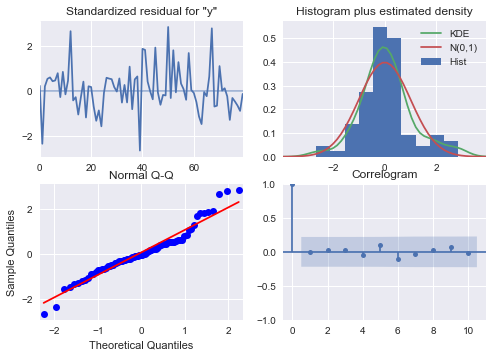

In [154]:
results_auto_SARIMA_soft.plot_diagnostics()
plt.show()

In [155]:
SARIMA_test.head()

SoftDrinkProduction
Time_Stamp                     
1991-01-31                 2211
1991-02-28                 3260
1991-03-31                 2992
1991-04-30                 2425
1991-05-31                 2707

In [156]:
pred_dynamic = results_auto_SARIMA_soft.get_prediction(dynamic=True, full_results=True)

In [157]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_soft = results_auto_SARIMA_soft.get_forecast(steps=len(SARIMA_test['SoftDrinkProduction']),alpha=0.05)

In [158]:
predicted_auto_SARIMA_soft.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2627.147079  338.691349    1963.324234    3290.969924
1  2943.022435  345.099594    2266.639660    3619.405209
2  3416.016814  346.724007    2736.450249    4095.583380
3  3152.628532  347.564787    2471.414068    3833.842996
4  3268.336396  348.916292    2584.473030    3952.199762

In [159]:
soft_forecasted = pred_dynamic.predicted_mean
SARIMA_test['soft_forecasted'] = predicted_auto_SARIMA_soft.predicted_mean
SARIMA_test.head()

SoftDrinkProduction  soft_forecasted
Time_Stamp                                      
1991-01-31                 2211      2627.147079
1991-02-28                 3260      2943.022435
1991-03-31                 2992      3416.016814
1991-04-30                 2425      3152.628532
1991-05-31                 2707      3268.336396

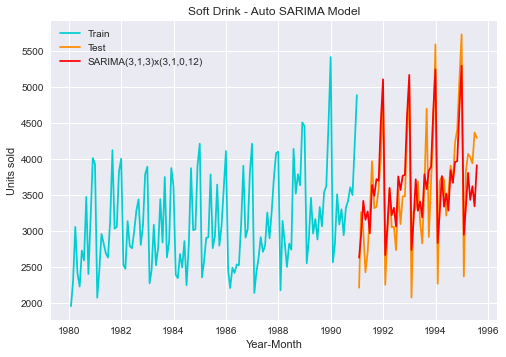

In [160]:
plt.plot(train['SoftDrinkProduction'], label='Train', color = 'darkturquoise')
plt.plot(test['SoftDrinkProduction'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['soft_forecasted'], color='red', label='SARIMA(3,1,3)x(3,1,0,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Soft Drink - Auto SARIMA Model')
plt.legend(loc='best')

In [161]:
rmse_soft_model8_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SARIMA_test['soft_forecasted'],squared=False)
mape_soft_model8_test = MAPE(test['SoftDrinkProduction'],SARIMA_test['soft_forecasted'])
print("For SARIMA forecast on the Soft Drink Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_model8_test, mape_soft_model8_test))

For SARIMA forecast on the Soft Drink Testing Data:  RMSE is 425.275 and MAPE is 10.03


In [162]:
resultsDf_8_soft1 = pd.DataFrame({'Test RMSE': [rmse_soft_model8_test],'Test MAPE': [mape_soft_model8_test]},index=['Auto SARIMA(3,1,3)x(3,1,0,12)'])

soft_resultsDf = pd.concat([soft_resultsDf, resultsDf_8_soft1])
soft_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                        775.807810      16.12
NaiveModel                             1519.259233      37.75
SimpleAverage                           934.353358      20.12
2 point TMA                             556.725418      10.67
4 point TMA                             687.181726      13.71
6 point TMA                             710.513877      15.01
9 point TMA                             735.889827      15.33
SES Alpha 0.00                          847.635259      18.86
DES Alpha 0.1,Beta 0.1                  985.420000      23.72
DES Alpha 0.6,Beta 0.0                 2892.865563      74.69
TES Alpha 0.4, Beta 0.1, Gamma 0.2      596.937644      12.94
TES Alpha 0.15, Beta 0.00, Gamma 0.37   460.081582      10.29
Auto SARIMA(3,1,3)x(3,1,0,12)           425.275365      10.03

In [163]:
soft_log_train = np.log10(SARIMA_train['SoftDrinkProduction'])

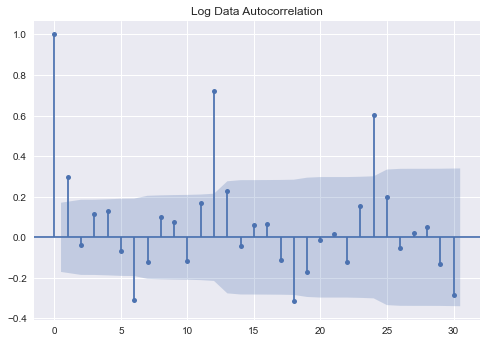

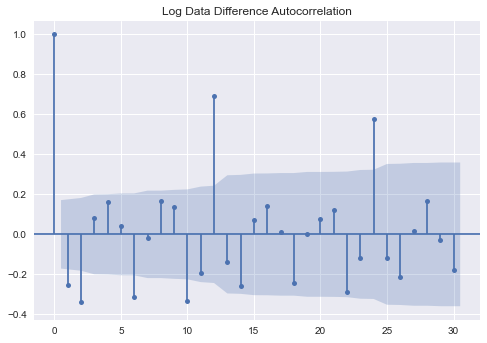

In [164]:
plot_acf(soft_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(soft_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

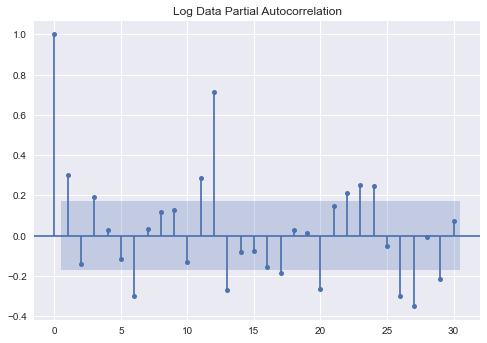

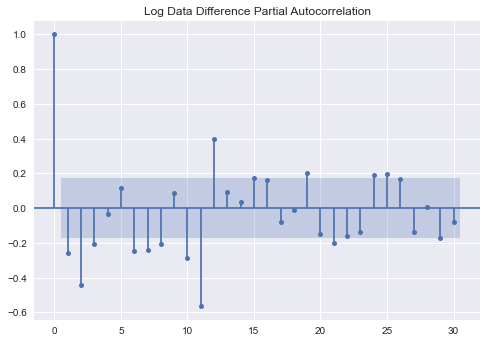

In [165]:
plot_pacf(soft_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(soft_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

In [166]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [167]:
SARIMA_AIC_soft_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_soft_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [168]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_soft_log = sm.tsa.statespace.SARIMAX(soft_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_soft_log = SARIMA_model_soft_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_soft_log.aic))
        SARIMA_AIC_soft_log = SARIMA_AIC_soft_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_soft_log.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-227.55276474092852
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-264.85677018302914
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-254.02724601521868
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-312.3266315187099
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-303.36340640174467
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-260.93814574233915
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-329.7558777288235
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-336.41696482017517
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-299.7807838215193
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-296.2118297640366
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-301.3628100034196
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-258.94459857137844
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-299.86783705617444
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-300.2803918785307
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-299.5814286970274
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-263.23265897143403
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-261.35067394369605
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-

In [169]:
SARIMA_AIC_soft_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -384.494305
79   (1, 1, 1)  (1, 0, 1, 12) -383.068027
133  (2, 1, 1)  (1, 0, 1, 12) -380.165903
43   (0, 1, 2)  (1, 0, 1, 12) -380.022485
97   (1, 1, 2)  (1, 0, 1, 12) -378.110232

In [170]:
import statsmodels.api as sm

auto_SARIMA_soft_log = sm.tsa.statespace.SARIMAX(soft_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_soft_log = auto_SARIMA_soft_log.fit(maxiter=1000)
print(results_auto_SARIMA_soft_log.summary())

                                     SARIMAX Results                                      
Dep. Variable:                SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 196.247
Date:                            Tue, 22 Mar 2022   AIC                           -384.494
Time:                                    06:53:48   BIC                           -373.446
Sample:                                01-31-1980   HQIC                          -380.009
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8449      0.062    -13.717      0.000      -0.966      -0.724
ar.S.L12       0.9618      0.028   

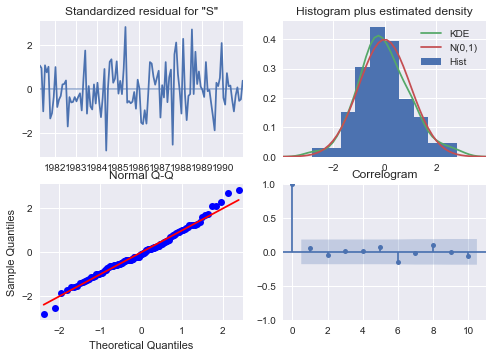

In [171]:
results_auto_SARIMA_soft_log.plot_diagnostics()
plt.show()

Predict on the Test Set using this model

In [172]:
SARIMA_test.head()

SoftDrinkProduction  soft_forecasted
Time_Stamp                                      
1991-01-31                 2211      2627.147079
1991-02-28                 3260      2943.022435
1991-03-31                 2992      3416.016814
1991-04-30                 2425      3152.628532
1991-05-31                 2707      3268.336396

In [173]:
pred_dynamic = results_auto_SARIMA_soft_log.get_prediction(dynamic=True, full_results=True)

In [174]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_soft_log = results_auto_SARIMA_soft_log.get_forecast(steps=len(SARIMA_test['SoftDrinkProduction']), alpha=0.1)

In [175]:
predicted_auto_SARIMA_soft_log.summary_frame(alpha=0.05).head()

SoftDrinkProduction      mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31           3.421973  0.044013       3.335709       3.508237
1991-02-28           3.471986  0.044539       3.384691       3.559280
1991-03-31           3.527293  0.045058       3.438980       3.615606
1991-04-30           3.487288  0.045572       3.397968       3.576609
1991-05-31           3.513562  0.046080       3.423246       3.603878

In [176]:
# Extract the predicted and true values of our time series
soft_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['soft_log_forecasted'] = np.power(10, predicted_auto_SARIMA_soft_log.predicted_mean)
SARIMA_test.head()

SoftDrinkProduction  soft_forecasted  soft_log_forecasted
Time_Stamp                                                           
1991-01-31                 2211      2627.147079          2642.244773
1991-02-28                 3260      2943.022435          2964.732505
1991-03-31                 2992      3416.016814          3367.384795
1991-04-30                 2425      3152.628532          3071.060349
1991-05-31                 2707      3268.336396          3262.586148

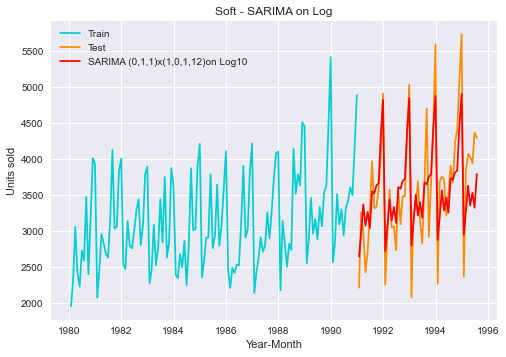

In [177]:
plt.plot(train['SoftDrinkProduction'], label='Train', color = 'darkturquoise')
plt.plot(test['SoftDrinkProduction'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['soft_log_forecasted'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Soft - SARIMA on Log')
plt.legend(loc='best')

In [178]:
rmse_soft_model8_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SARIMA_test['soft_log_forecasted'],squared=False)
mape_soft_model8_test = MAPE(test['SoftDrinkProduction'],SARIMA_test['soft_log_forecasted'])
print("For SARIMA forecast on the Soft Drink Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_model8_test, mape_soft_model8_test))

For SARIMA forecast on the Soft Drink Testing Data:  RMSE is 450.700 and MAPE is 10.44


In [179]:
resultsDf_8_soft2 = pd.DataFrame({'Test RMSE': [rmse_soft_model8_test],'Test MAPE': [mape_soft_model8_test]},index=['Auto SARIMA(0,1,1)x(1,0,1,12)-Log10'])

soft_resultsDf = pd.concat([soft_resultsDf, resultsDf_8_soft2])
soft_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                        775.807810      16.12
NaiveModel                             1519.259233      37.75
SimpleAverage                           934.353358      20.12
2 point TMA                             556.725418      10.67
4 point TMA                             687.181726      13.71
6 point TMA                             710.513877      15.01
9 point TMA                             735.889827      15.33
SES Alpha 0.00                          847.635259      18.86
DES Alpha 0.1,Beta 0.1                  985.420000      23.72
DES Alpha 0.6,Beta 0.0                 2892.865563      74.69
TES Alpha 0.4, Beta 0.1, Gamma 0.2      596.937644      12.94
TES Alpha 0.15, Beta 0.00, Gamma 0.37   460.081582      10.29
Auto SARIMA(3,1,3)x(3,1,0,12)           425.275365      10.03
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     450.700309      10.44

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

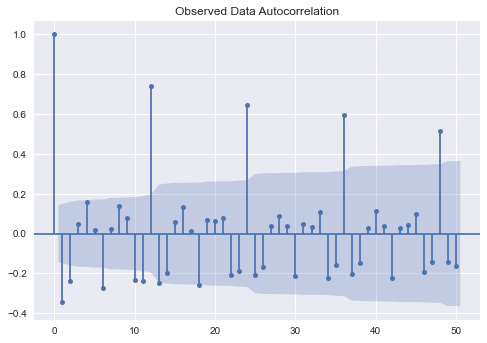

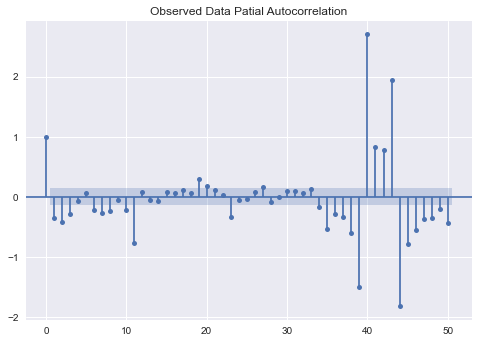

In [180]:
plot_acf(df_soft['SoftDrinkProduction'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(df_soft['SoftDrinkProduction'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

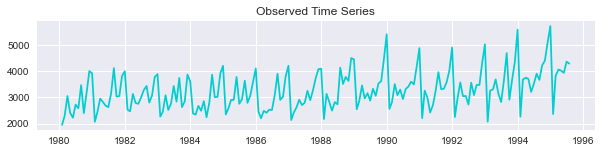

In [181]:
plt.figure(figsize=(10,2))
plt.plot(df_soft['SoftDrinkProduction'], color = 'darkturquoise')
plt.title ('Observed Time Series');

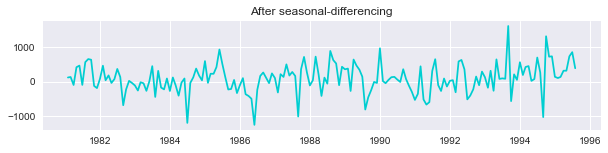

In [182]:
plt.figure(figsize=(10,2))
plt.plot(df_soft['SoftDrinkProduction'].diff(12).dropna(), color = 'darkturquoise')
plt.title ('After seasonal-differencing');

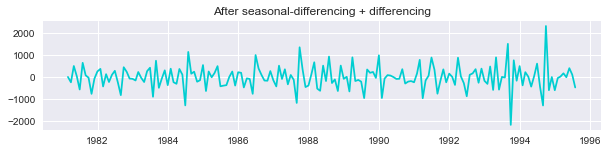

In [183]:
plt.figure(figsize=(10,2))
plt.plot((df_soft['SoftDrinkProduction'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

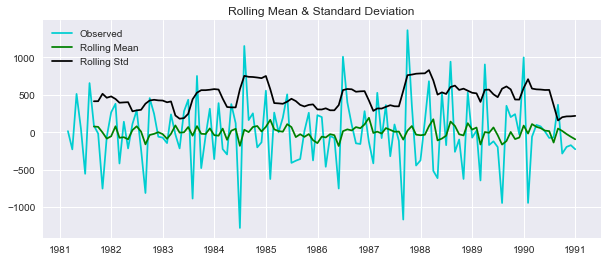

Results of Dickey-Fuller Test:
Test Statistic                  -5.145534
p-value                          0.000011
#Lags Used                      13.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64 



In [184]:
plt.figure(figsize=(10,4))
test_stationarity((SARIMA_train['SoftDrinkProduction'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

Checking the ACF and the PACF plots for the new modified Time Series.

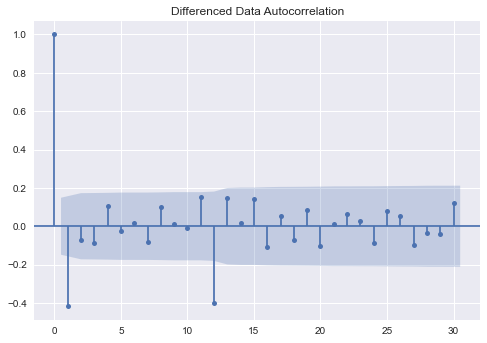

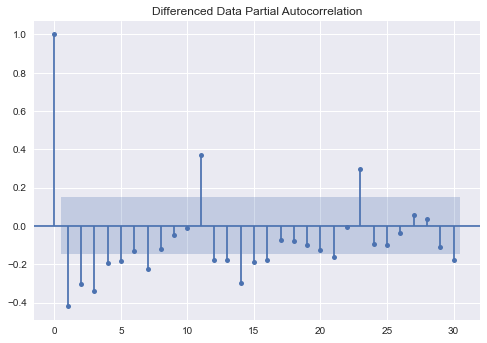

In [185]:
plot_acf((df_soft['SoftDrinkProduction'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((df_soft['SoftDrinkProduction'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

In [186]:
import statsmodels.api as sm

manual_SARIMA_soft = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_soft = manual_SARIMA_soft.fit(maxiter=1000)
print(results_manual_SARIMA_soft.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -674.378
Date:                                 Tue, 22 Mar 2022   AIC                           1364.757
Time:                                         06:53:52   BIC                           1385.017
Sample:                                              0   HQIC                          1372.937
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0993      0.137      0.727      0.467      -0.168       0

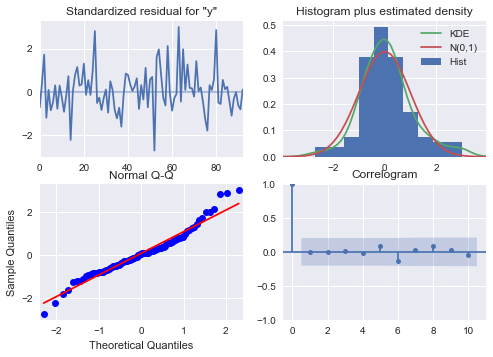

In [187]:
results_manual_SARIMA_soft.plot_diagnostics()
plt.show()

In [188]:
pred_dynamic = results_manual_SARIMA_soft.get_prediction(dynamic=True, full_results=True)

In [189]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_soft = results_manual_SARIMA_soft.get_forecast(steps=len(SARIMA_test['SoftDrinkProduction']), alpha=0.5)

In [190]:
predicted_manual_SARIMA_soft.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2619.086329  338.479004    1955.679673    3282.492986
1  2943.092903  343.373777    2270.092667    3616.093140
2  3394.262927  344.409705    2719.232309    4069.293545
3  3073.249623  348.097805    2390.990462    3755.508783
4  3275.783245  349.665970    2590.450537    3961.115953

In [191]:
# Extract the predicted and true values of our time series
spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['soft_manual_forecasted'] = predicted_manual_SARIMA_soft.predicted_mean
SARIMA_test.head()

SoftDrinkProduction  soft_forecasted  soft_log_forecasted  \
Time_Stamp                                                              
1991-01-31                 2211      2627.147079          2642.244773   
1991-02-28                 3260      2943.022435          2964.732505   
1991-03-31                 2992      3416.016814          3367.384795   
1991-04-30                 2425      3152.628532          3071.060349   
1991-05-31                 2707      3268.336396          3262.586148   

            soft_manual_forecasted  
Time_Stamp                          
1991-01-31             2619.086329  
1991-02-28             2943.092903  
1991-03-31             3394.262927  
1991-04-30             3073.249623  
1991-05-31             3275.783245

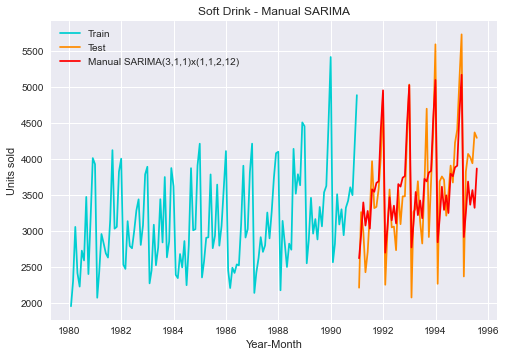

In [192]:
plt.plot(train['SoftDrinkProduction'], label='Train', color = 'darkturquoise')
plt.plot(test['SoftDrinkProduction'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['soft_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Soft Drink - Manual SARIMA')
plt.legend(loc='best')

In [193]:
rmse_soft_model8_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SARIMA_test['soft_manual_forecasted'],squared=False)
mape_soft_model8_test = MAPE(test['SoftDrinkProduction'],SARIMA_test['soft_manual_forecasted'])
print("For SARIMA forecast on the Soft Drink Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_model8_test, mape_soft_model8_test))

For SARIMA forecast on the Soft Drink Testing Data:  RMSE is 430.481 and MAPE is 10.13


# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [194]:
resultsDf_8_soft3 = pd.DataFrame({'Test RMSE': [rmse_soft_model8_test],'Test MAPE': [mape_soft_model8_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

soft_resultsDf = pd.concat([soft_resultsDf, resultsDf_8_soft3])
soft_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                        775.807810      16.12
NaiveModel                             1519.259233      37.75
SimpleAverage                           934.353358      20.12
2 point TMA                             556.725418      10.67
4 point TMA                             687.181726      13.71
6 point TMA                             710.513877      15.01
9 point TMA                             735.889827      15.33
SES Alpha 0.00                          847.635259      18.86
DES Alpha 0.1,Beta 0.1                  985.420000      23.72
DES Alpha 0.6,Beta 0.0                 2892.865563      74.69
TES Alpha 0.4, Beta 0.1, Gamma 0.2      596.937644      12.94
TES Alpha 0.15, Beta 0.00, Gamma 0.37   460.081582      10.29
Auto SARIMA(3,1,3)x(3,1,0,12)           425.275365      10.03
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     450.700309      10.44
Manual SARIMA(3,1,1)x(1,1,2,12)         430.481388      10.13

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [195]:
soft_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
Auto SARIMA(3,1,3)x(3,1,0,12)           425.275365      10.03
Manual SARIMA(3,1,1)x(1,1,2,12)         430.481388      10.13
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     450.700309      10.44
TES Alpha 0.15, Beta 0.00, Gamma 0.37   460.081582      10.29
2 point TMA                             556.725418      10.67
TES Alpha 0.4, Beta 0.1, Gamma 0.2      596.937644      12.94
4 point TMA                             687.181726      13.71
6 point TMA                             710.513877      15.01
9 point TMA                             735.889827      15.33
RegressionOnTime                        775.807810      16.12
SES Alpha 0.00                          847.635259      18.86
SimpleAverage                           934.353358      20.12
DES Alpha 0.1,Beta 0.1                  985.420000      23.72
NaiveModel                             1519.259233      37.75
DES Alpha 0.6,Beta 0.0                 2892.865563      74.69

In [196]:
soft_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
Auto SARIMA(3,1,3)x(3,1,0,12)           425.275365      10.03
Manual SARIMA(3,1,1)x(1,1,2,12)         430.481388      10.13
TES Alpha 0.15, Beta 0.00, Gamma 0.37   460.081582      10.29
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     450.700309      10.44
2 point TMA                             556.725418      10.67
TES Alpha 0.4, Beta 0.1, Gamma 0.2      596.937644      12.94
4 point TMA                             687.181726      13.71
6 point TMA                             710.513877      15.01
9 point TMA                             735.889827      15.33
RegressionOnTime                        775.807810      16.12
SES Alpha 0.00                          847.635259      18.86
SimpleAverage                           934.353358      20.12
DES Alpha 0.1,Beta 0.1                  985.420000      23.72
NaiveModel                             1519.259233      37.75
DES Alpha 0.6,Beta 0.0                 2892.865563      74.69

Plot all the forecast

Text(0.5, 1.0, 'SOFT DRINK : Forecasts Vs Test Data')

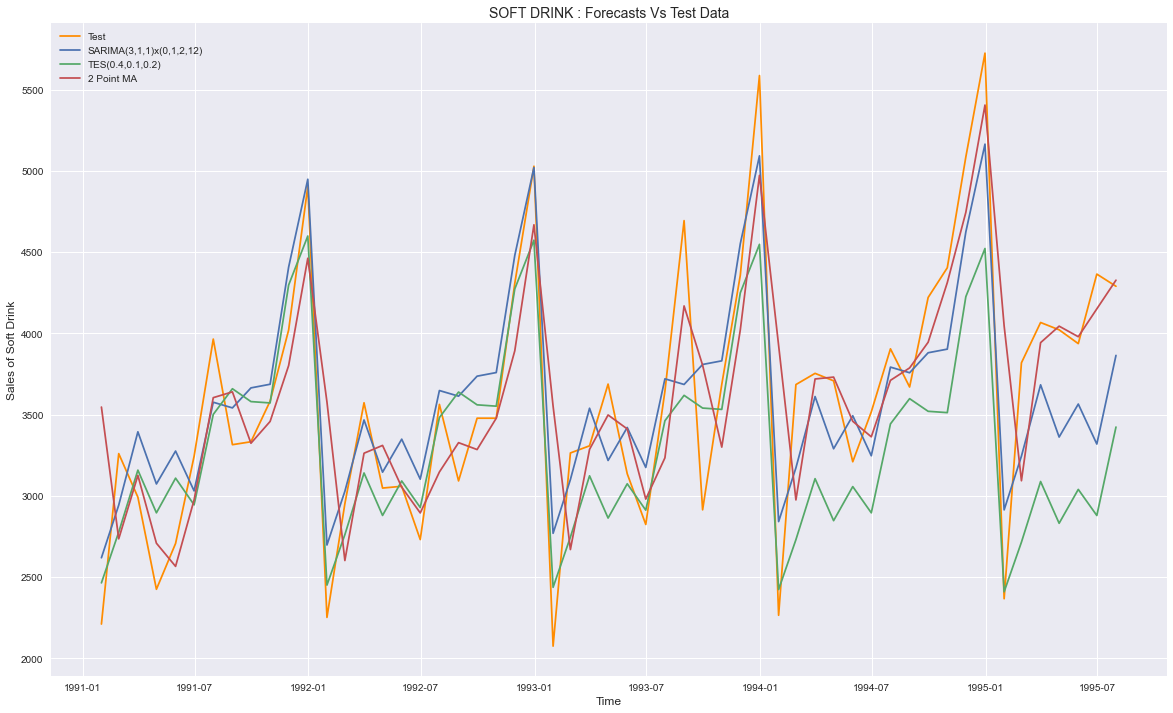

In [197]:
plt.figure(figsize=(20,12))

plt.plot(TES_test['SoftDrinkProduction'], label='Test', color = 'darkorange')
plt.plot(SARIMA_test['soft_manual_forecasted'],  label='SARIMA(3,1,1)x(0,1,2,12)')
plt.plot(TES_test['predict_soft',0.4,0.1,0.2],  label='TES(0.4,0.1,0.2)')
plt.plot(trailing_MovingAverage_test['Soft_Trailing_2'],  label='2 Point MA')
plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Soft Drink',fontsize=12)
plt.title('SOFT DRINK : Forecasts Vs Test Data', fontsize=14)

Build model on all of the dataset using best model, which is TES



In [206]:
model_TES_soft = ExponentialSmoothing(df_soft['SoftDrinkProduction'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_soft_fit = model_TES_soft.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_soft_forecast = model_TES_soft_fit.forecast(steps=12)

In [207]:
rmse_soft_tes_full = metrics.mean_squared_error(df_soft['SoftDrinkProduction'],model_TES_soft_fit.fittedvalues,squared=False)
mape_soft_tes_full = MAPE(df_soft['SoftDrinkProduction'],model_TES_soft_fit.fittedvalues)
print("TES forecast on the Soft Drink Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_tes_full, mape_soft_tes_full))

TES forecast on the Soft Drink Full Data:  RMSE is 367.263 and MAPE is 8.83


Text(0.5, 1.0, 'SOFT DRINK : 12 Months Forecast using TES Model')

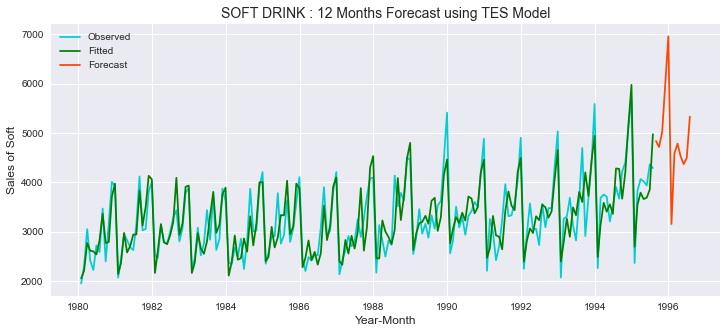

In [210]:
plt.figure(figsize=(12,5))

plt.plot(df_soft['SoftDrinkProduction'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_soft_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_soft_forecast, label='Forecast', color = 'orangered')
plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Soft',fontsize=12)
plt.title('SOFT DRINK : 12 Months Forecast using TES Model', fontsize=14)

Text(0.5, 1.0, 'SOFT DRINK : 12 Months Forecast')

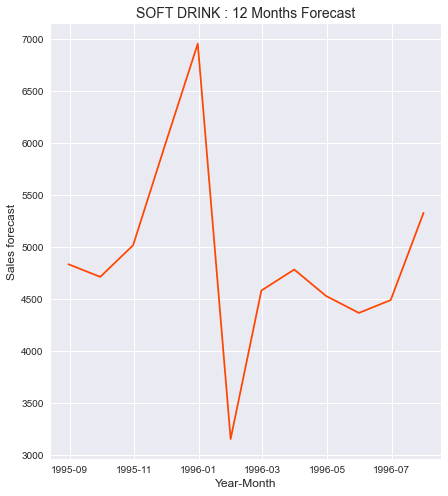

In [213]:
plt.figure(figsize=(7,8))
plt.plot(TES_soft_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SOFT DRINK : 12 Months Forecast', fontsize=14)

Attempt SARIMA(3,1,1)x(1,1,2,12) for forecast

In [214]:
soft_full_data_model = sm.tsa.statespace.SARIMAX(df_soft['SoftDrinkProduction'],
                                order=(3,1,3),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_soft = soft_full_data_model.fit(maxiter=1000)
print(results_full_data_model_soft.summary())

                                        SARIMAX Results                                        
Dep. Variable:                     SoftDrinkProduction   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1062.509
Date:                                 Tue, 22 Mar 2022   AIC                           2145.017
Time:                                         07:05:13   BIC                           2174.853
Sample:                                     01-31-1980   HQIC                          2157.140
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4488      0.099     -4.536      0.000      -0.643      -0

In [215]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,7

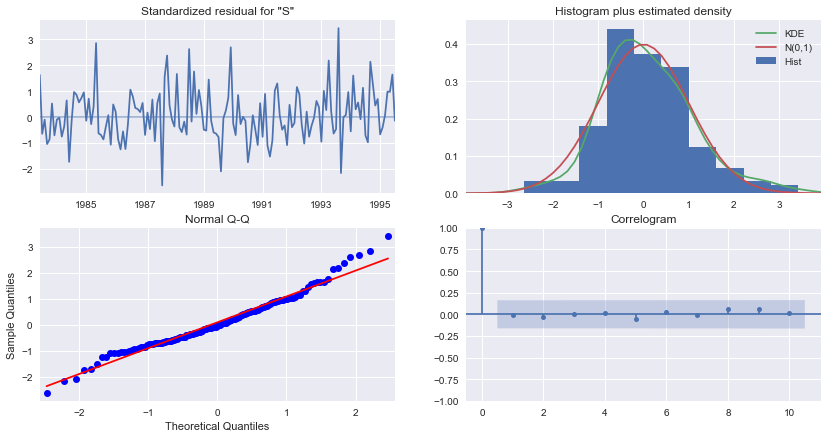

In [216]:
results_full_data_model_soft.plot_diagnostics();

In [217]:
predicted_soft_SARIMA_full_data = results_full_data_model_soft.get_forecast(steps=12)

In [218]:
predicted_soft_SARIMA_full_data.summary_frame(alpha=0.05).head()


SoftDrinkProduction         mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31           4375.663225  346.541368    3696.454625    5054.871826
1995-09-30           4194.296698  348.339827    3511.563183    4877.030214
1995-10-31           4655.547061  353.136102    3963.413019    5347.681103
1995-11-30           5066.254343  354.494285    4371.458311    5761.050375
1995-12-31           5916.576459  360.588717    5209.835561    6623.317357

In [219]:
rmse_soft_sarima_full = metrics.mean_squared_error(df_soft['SoftDrinkProduction'],results_full_data_model_soft.fittedvalues,squared=False)
mape_soft_sarima_full = MAPE(df_soft['SoftDrinkProduction'],results_full_data_model_soft.fittedvalues)
print("For SARIMA forecast on the Soft Drink Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_soft_sarima_full, mape_soft_sarima_full))

For SARIMA forecast on the Soft Drink Full Data:  RMSE is 471.058 and MAPE is 9.74


In [220]:
pred_full_manual_SARIMA_date = predicted_soft_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

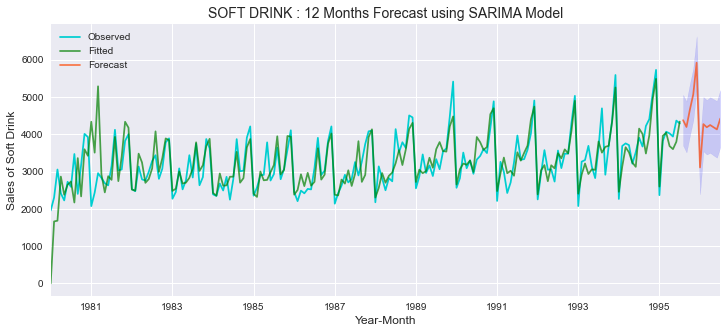

In [221]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,5))

axis = df_soft['SoftDrinkProduction'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_soft.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Soft Drink',fontsize=12)
plt.title('SOFT DRINK : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'SOFT DRINK : 12 Months Forecast')

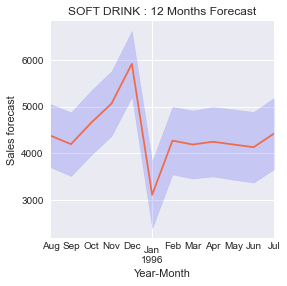

In [222]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SOFT DRINK : 12 Months Forecast', fontsize=12)

In [223]:
forecast = pd.DataFrame({'SoftDrinkProduction':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

SoftDrinkProduction
1995-08-31              4375.66
1995-09-30              4194.30
1995-10-31              4655.55
1995-11-30              5066.25
1995-12-31              5916.58
1996-01-31              3108.26
1996-02-29              4270.32
1996-03-31              4186.94
1996-04-30              4246.13
1996-05-31              4187.16
1996-06-30              4129.48
1996-07-31              4419.88

In [224]:
forecast.describe()

SoftDrinkProduction
count            12.000000
mean           4396.375833
std             655.418943
min            3108.260000
25%            4187.105000
50%            4258.225000
75%            4478.797500
max            5916.580000